First step is importing the necessary libraries ,printng the datasets individually and merging the all the datasets in one dataset it is named as MASTER DATASET  
Dataset 1:
   index                         product                    helpful_count  \
0      0  Apple iPhone XR (64GB) - Black  5,087 people found this helpful   
1      1  Apple iPhone XR (64GB) - Black  2,822 people found this helpful   
2      2  Apple iPhone XR (64GB) - Black  1,798 people found this helpful   
3      3  Apple iPhone XR (64GB) - Black  1,366 people found this helpful   
4      4  Apple iPhone XR (64GB) - Black    536 people found this helpful   

   total_comments                                                url  \
0              24  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
1               6  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
2               0  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
3              14  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
4  

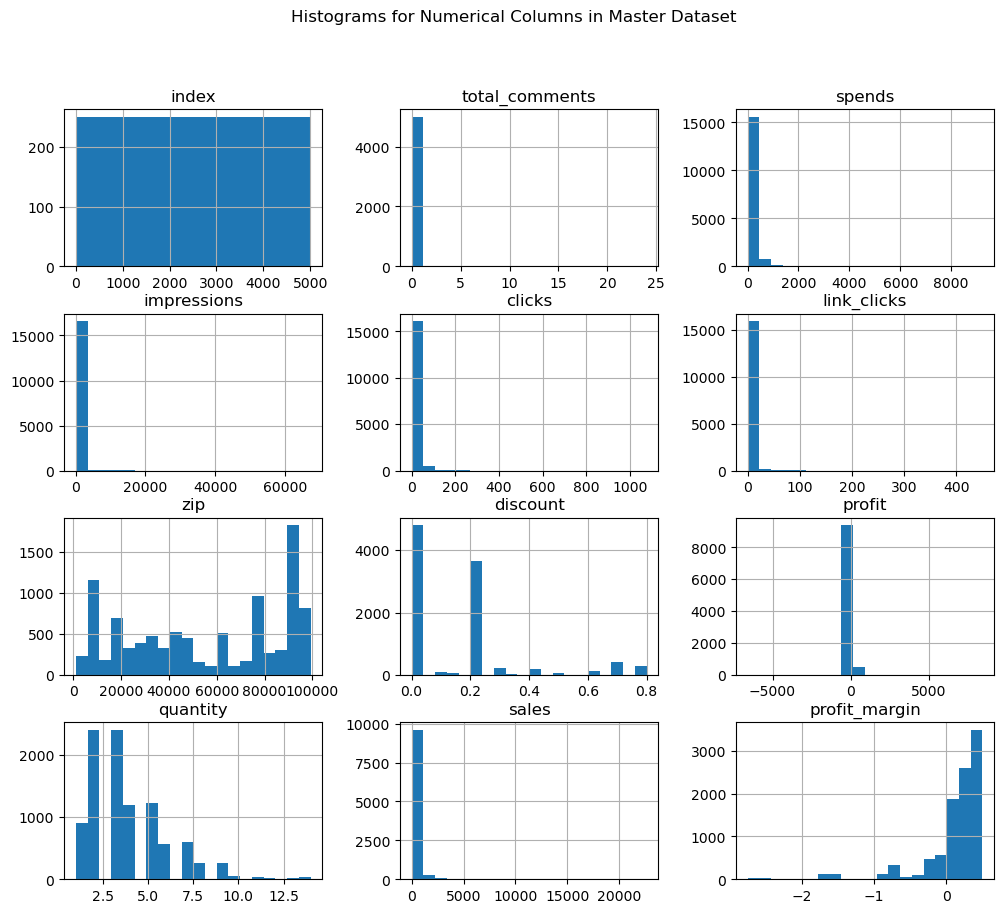

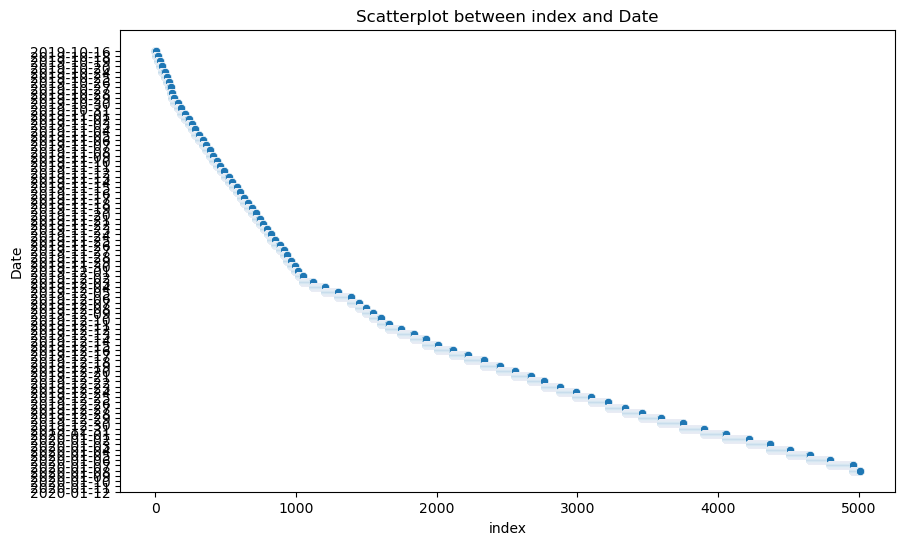

--------------------------------------------------This is basic checks---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            5010 non-null   float64
 1   product          5010 non-null   object 
 2   helpful_count    5010 non-null   object 
 3   total_comments   5010 non-null   float64
 4   url              5010 non-null   object 
 5   review_country   5010 non-null   object 
 6   reviewed_at      5010 non-null   object 
 7   review_text      5007 non-null   object 
 8   review_rating    5010 non-null   object 
 9   product_company  5010 non-null   object 
 10  profile_name     5010 non-null   object 
 11  review_title     5008 non-null   object 
 12  Date             16834 non-null  object 
 13  product          16834 non-null  object 
 14  device           16834

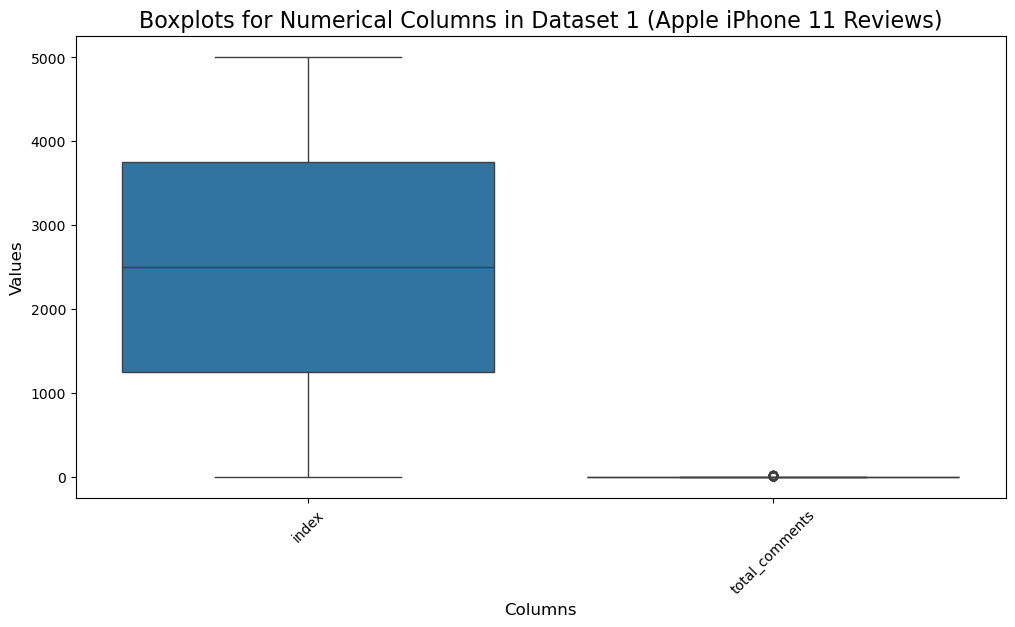

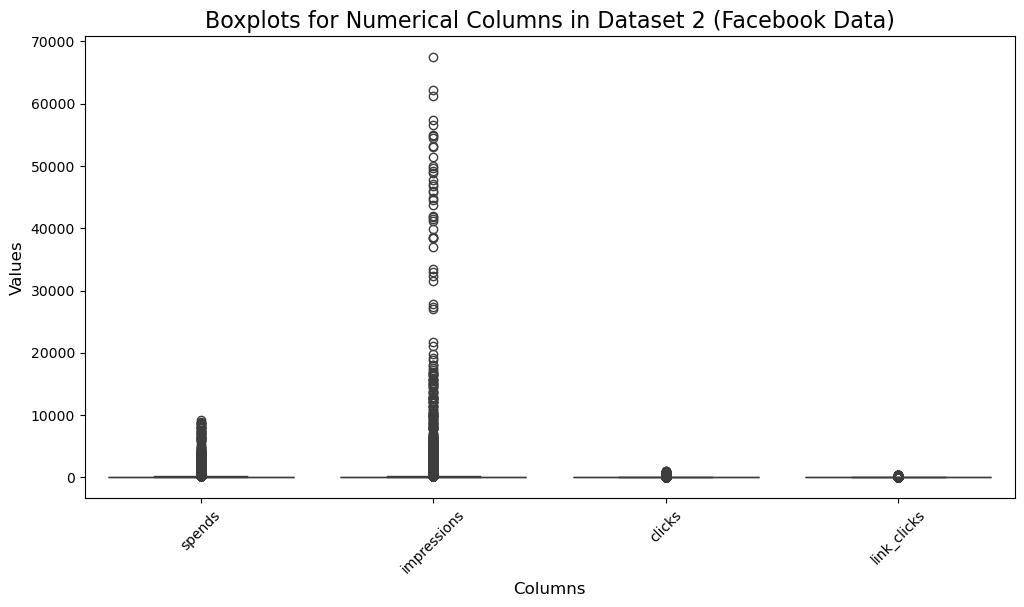

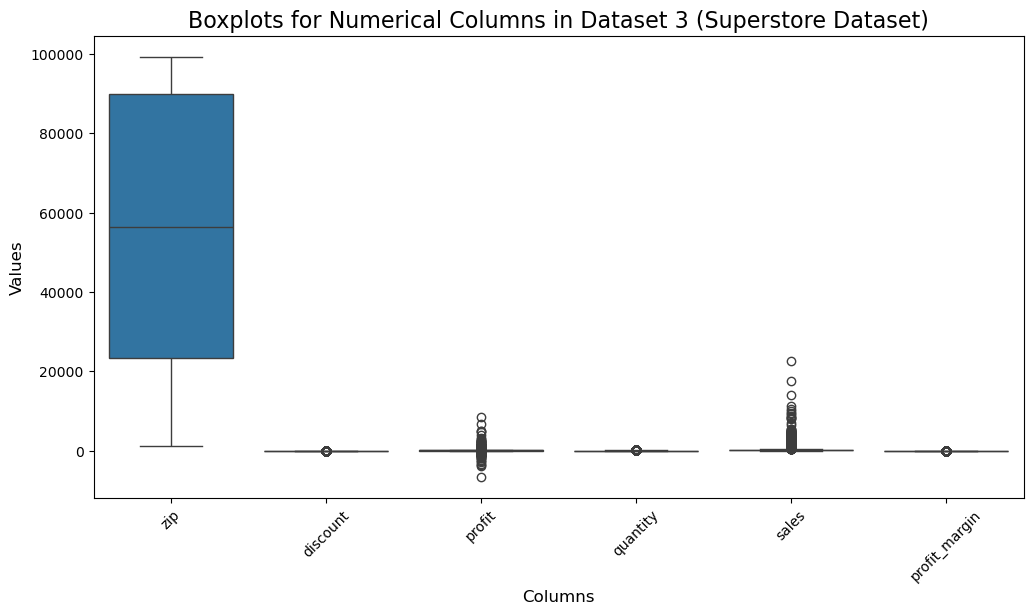

---------------------------------------------Boxplot for Numerical Columns in Master Dataset---------------------------------------------------------


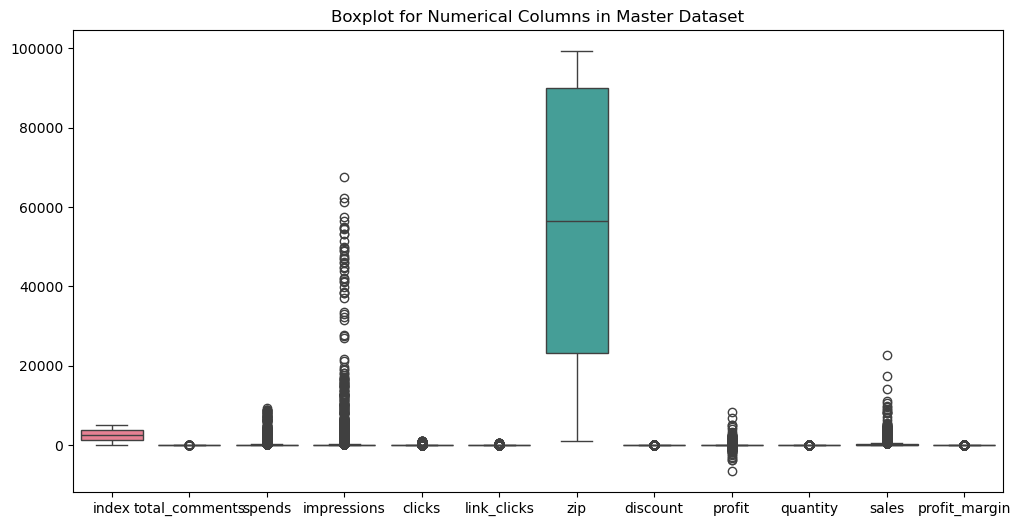

---------------------------------------------Columns to check for outliers---------------------------------------------------------


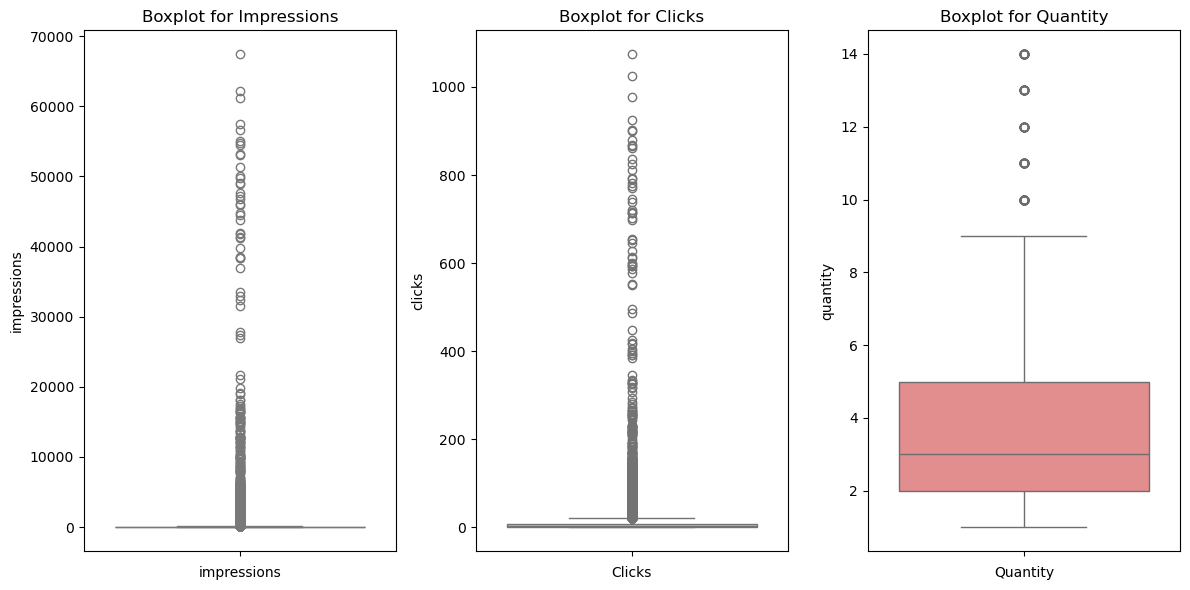

------------------Relations between the DayIndex vs Sales ,DayIndex vs Impression and DayIndex vs Clics----------------------------


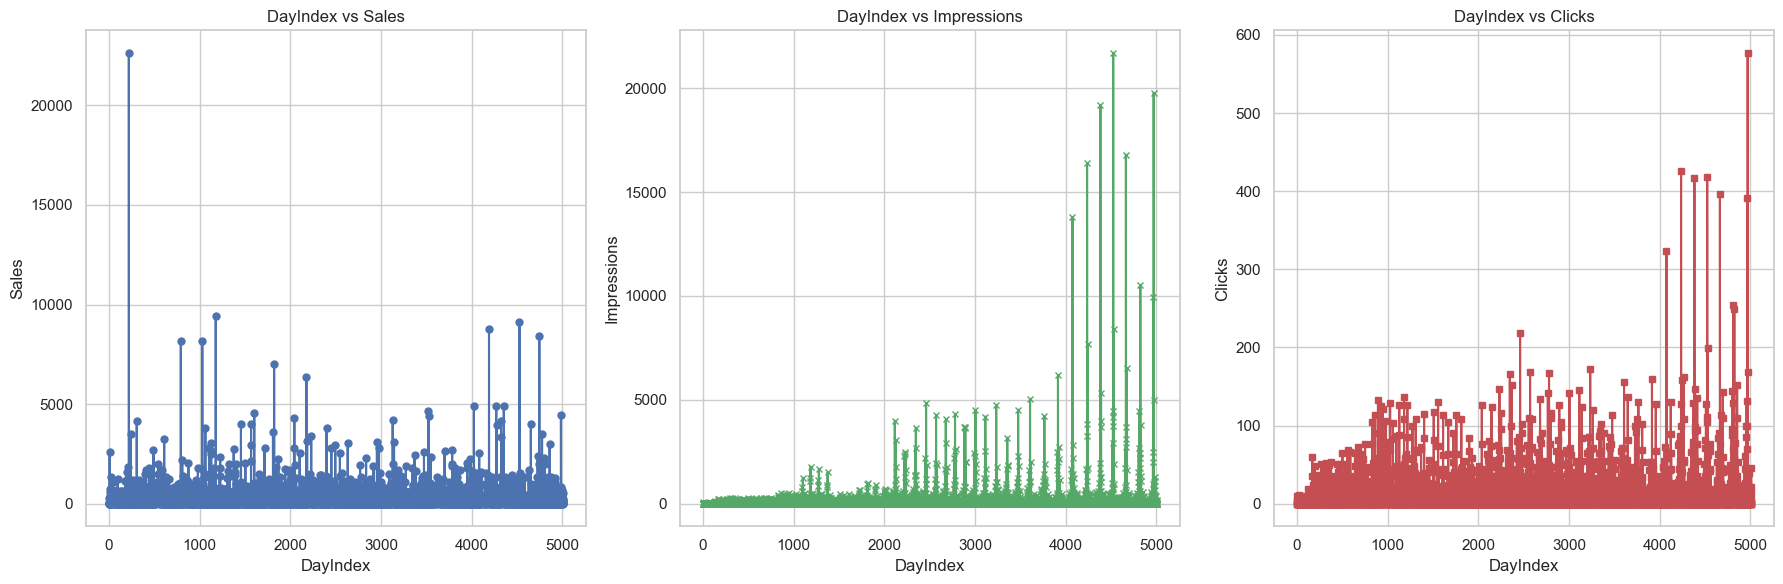

--------------------------------------------------------------------* ---------------------------------------------------------------


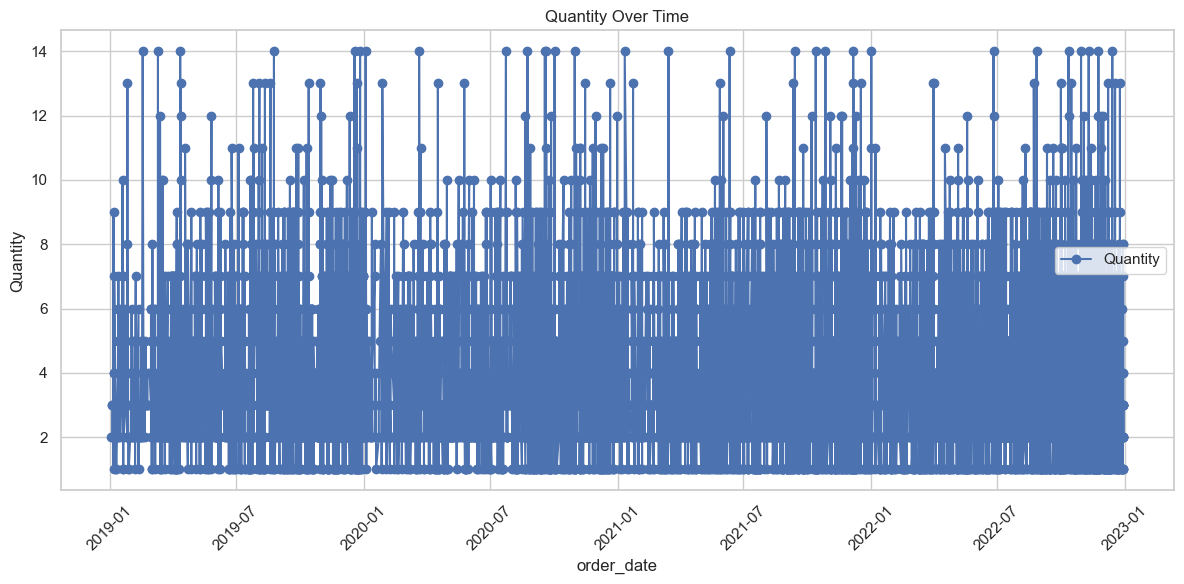

----------------------------------------------------------------*---------------------------------------------------------------------


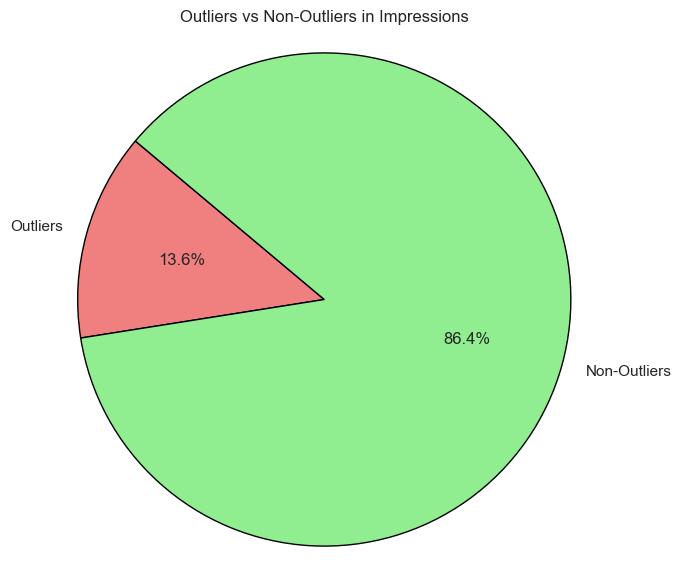

--------------------------------------------------------------------*--------------------------------------------------------------------------------


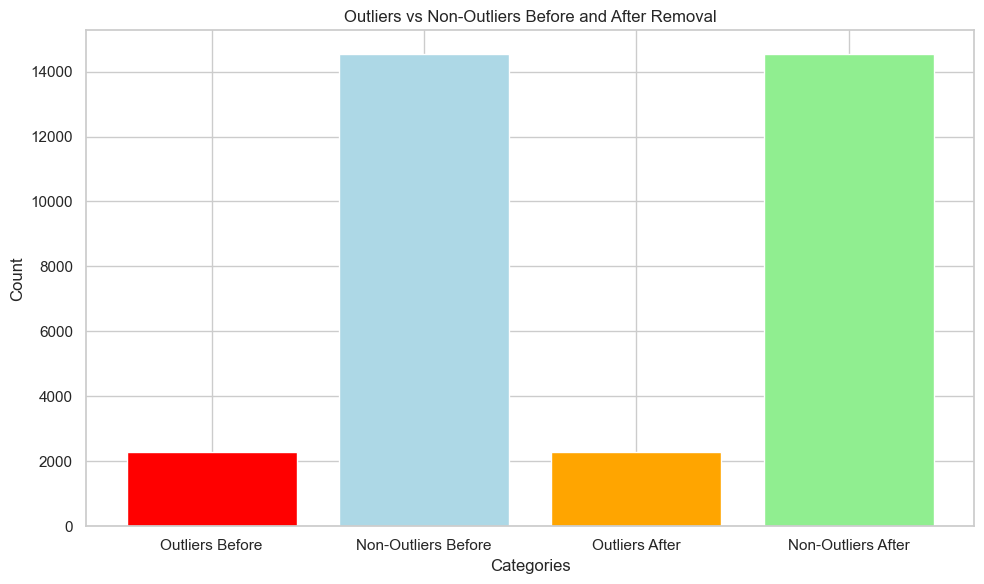

------------------------------------Feature Engineering and Exploratory Data Analysis--------------------------------------


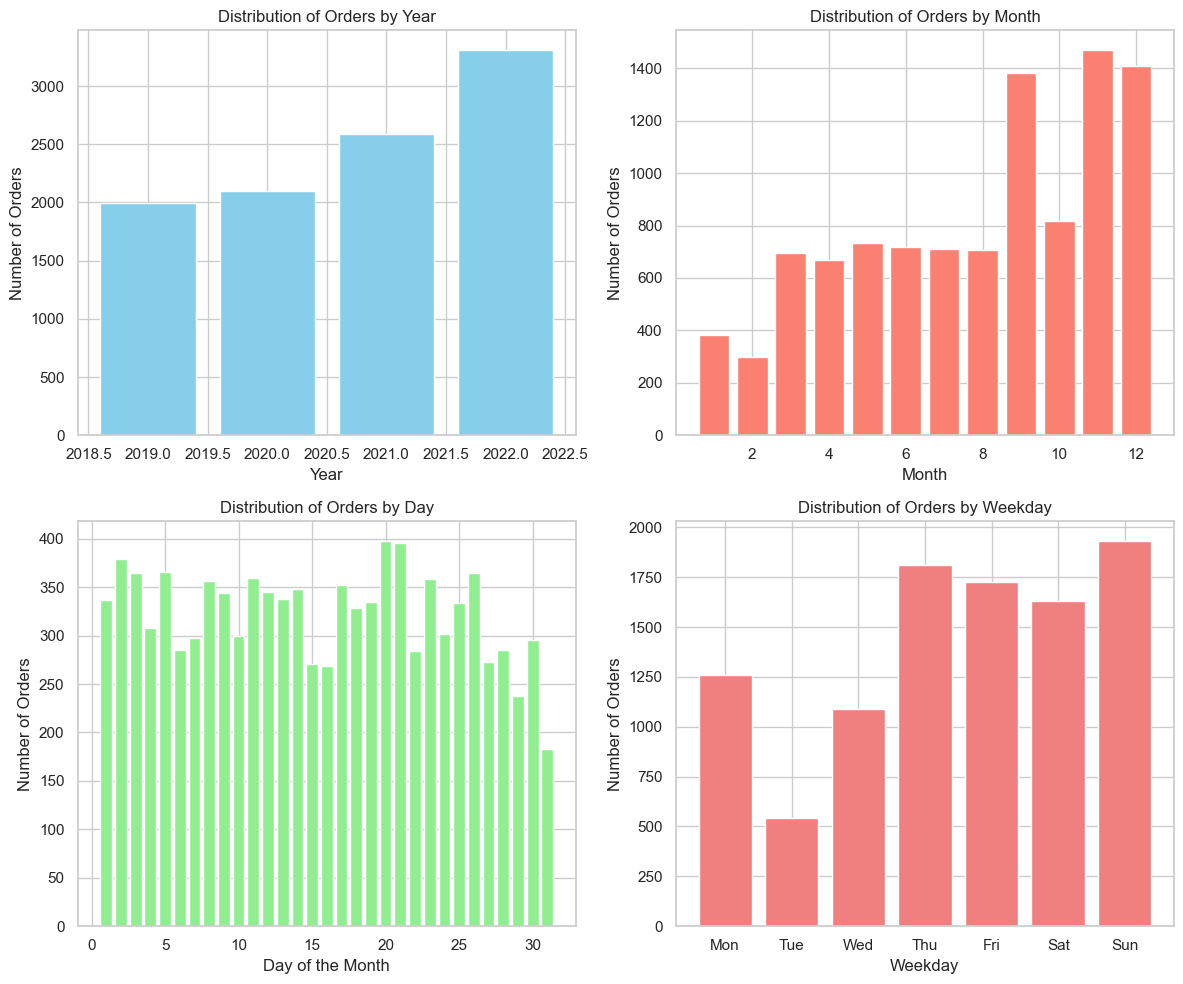

---------------------------------------------------Correlation  Matrix ------------------------------------------------------------


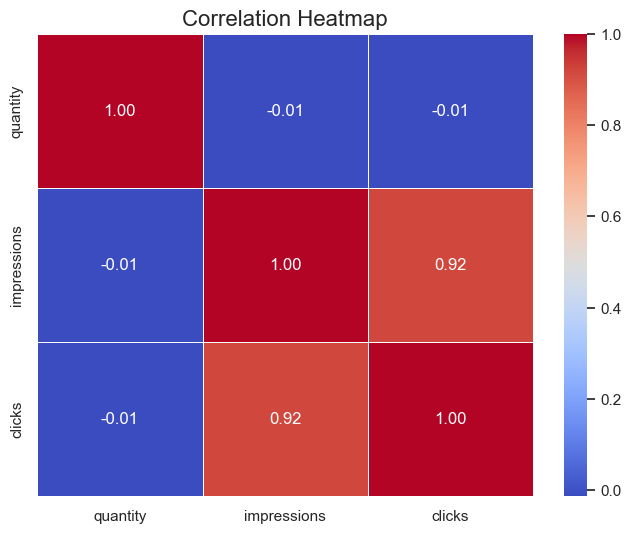

In [1]:
print("\033[1mFirst step is importing the necessary libraries ,printng the datasets individually and merging the all the datasets in one dataset it is named as MASTER DATASET  \033[0m")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Datasets one by one
dataset1 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\apple_iphone_11_reviews.csv')
dataset2 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\Copy of fbdata.csv')
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')
# Print each dataset separately
print("Dataset 1:")
print(dataset1.head())  

print("\nDataset 2:")
print(dataset2.head())

print("\nDataset 3:")
print(dataset3.head())

# Combine the datasets with printing distint coloumns
# Concatenating with axis=1 will place them side-by-side
master_dataset = pd.concat([dataset1, dataset2, dataset3], axis=1)

# Print the master dataset
print("\nmaster_dataset:")
print(master_dataset.head())  # Displaying first few rows for brevity

print("\033[1m-------------------------------Plot Histograms for numerical columns in the master dataset------------------------------------------\033[0m")
# Plot Histograms for numerical columns in the master dataset
master_dataset.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for Numerical Columns in Master Dataset')
plt.show()

# Scatterplot for a pair of numerical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=master_dataset, x=dataset1.columns[0], y=dataset2.columns[0])
plt.title(f'Scatterplot between {dataset1.columns[0]} and {dataset2.columns[0]}')
plt.show()

# Print bold text using ANSI escape codes
print("\033[1m--------------------------------------------------This is basic checks---------------------------------------------------------\033[0m")
print(master_dataset.info())
;ue
print("\033[1m----------------------------Checking for  the missed values in the DataFrame----------------------------------------------------\033[0m")
missing_values = master_dataset.isnull().sum()
print("MISSING VALUES:")
print(missing_values)

print("\033[1m---------------------------------------------Box Plots for each datasets---------------------------------------------------------\033[0m")
def create_boxplots(dataset, dataset_name):
    numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_columns) > 0:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=dataset[numerical_columns])
        plt.title(f"Boxplots for Numerical Columns in {dataset_name}", fontsize=16)
        plt.xlabel("Columns", fontsize=12)
        plt.ylabel("Values", fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No numerical columns found in {dataset_name}.")
# Create boxplots for each dataset
create_boxplots(dataset1, "Dataset 1 (Apple iPhone 11 Reviews)")
create_boxplots(dataset2, "Dataset 2 (Facebook Data)")
create_boxplots(dataset3, "Dataset 3 (Superstore Dataset)")

print("\033[1m---------------------------------------------Boxplot for Numerical Columns in Master Dataset---------------------------------------------------------\033[0m")

# Plot Boxplot for numerical columns in the master dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_dataset.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Columns in Master Dataset')
plt.show()

print("\033[1m---------------------------------------------Columns to check for outliers---------------------------------------------------------\033[0m")
# Assuming 'impressions', 'clicks', and 'quantity' columns exist in one of the datasets
# For example, dataset3 may contain 'impressions', 'clicks', and 'quantity' columns
# Plot Boxplot for Impressions, Clicks, and Quantity
plt.figure(figsize=(12, 6))

# Boxplot for Impressions
plt.subplot(1, 3, 1)
sns.boxplot(data=dataset2['impressions'], color='lightblue')
plt.title('Boxplot for Impressions')
plt.xlabel('impressions')

# Boxplot for Clicks
plt.subplot(1, 3, 2)
sns.boxplot(data=dataset2['clicks'], color='lightgreen')
plt.title('Boxplot for Clicks')
plt.xlabel('Clicks')

# Boxplot for Quantity
plt.subplot(1, 3, 3)
sns.boxplot(data=dataset3['quantity'], color='lightcoral')
plt.title('Boxplot for Quantity')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

        
print("\033[1m------------------Relations between the DayIndex vs Sales ,DayIndex vs Impression and DayIndex vs Clics----------------------------\033[0m")

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for the three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: DayIndex vs Sales
axes[0].plot(master_dataset['index'], master_dataset['sales'], color='b', marker='o', linestyle='-', markersize=5)
axes[0].set_title('DayIndex vs Sales')
axes[0].set_xlabel('DayIndex')
axes[0].set_ylabel('Sales')

# Plot 2: DayIndex vs Impressions
axes[1].plot(master_dataset['index'], master_dataset['impressions'], color='g', marker='x', linestyle='-', markersize=5)
axes[1].set_title('DayIndex vs Impressions')
axes[1].set_xlabel('DayIndex')
axes[1].set_ylabel('Impressions')

# Plot 3: DayIndex vs Clicks
axes[2].plot(master_dataset['index'], master_dataset['clicks'], color='r', marker='s', linestyle='-', markersize=5)
axes[2].set_title('DayIndex vs Clicks')
axes[2].set_xlabel('DayIndex')
axes[2].set_ylabel('Clicks')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


print("--------------------------------------------------------------------* ---------------------------------------------------------------")

# Assuming 'quantity' and 'date' columns exist in one of the datasets
# For this example, let's assume dataset3 has 'quantity' and 'date' columns
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])  # Convert date to datetime format
dataset3 = dataset3.sort_values(by='order_date')  # Sort by date to plot time series

# Plot Quantity over Time
plt.figure(figsize=(12, 6))
plt.plot(dataset3['order_date'], dataset3['quantity'], marker='o', linestyle='-', color='b', label='Quantity')
plt.title('Quantity Over Time')
plt.xlabel('order_date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("----------------------------------------------------------------*---------------------------------------------------------------------")


# Assuming dataset2 is already loaded and 'impressions' column exists
Q1 = dataset2['impressions'].quantile(0.25)
Q3 = dataset2['impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = dataset2[(dataset2['impressions'] < lower_bound) | (dataset2['impressions'] > upper_bound)]

# Count the number of outliers and non-outliers
outliers_count = len(outliers)
non_outliers_count = len(dataset2) - outliers_count

# Prepare data for the pie chart
labels = ['Outliers', 'Non-Outliers']
sizes = [outliers_count, non_outliers_count]
colors = ['lightcoral', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Outliers vs Non-Outliers in Impressions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
print("--------------------------------------------------------------------*--------------------------------------------------------------------------------")
# Assuming dataset2 is already loaded and 'impressions' column exists
Q1 = dataset2['impressions'].quantile(0.25)
Q3 = dataset2['impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_before = dataset2[(dataset2['impressions'] < lower_bound) | (dataset2['impressions'] > upper_bound)]
non_outliers_before = dataset2[(dataset2['impressions'] >= lower_bound) & (dataset2['impressions'] <= upper_bound)]

# Remove outliers from the dataset
dataset2_cleaned = dataset2[(dataset2['impressions'] >= lower_bound) & (dataset2['impressions'] <= upper_bound)]

# Count the number of outliers and non-outliers before and after removing them
outliers_count_before = len(outliers_before)
non_outliers_count_before = len(non_outliers_before)
outliers_count_after = len(dataset2) - len(dataset2_cleaned)  # Remaining outliers after removal
non_outliers_count_after = len(dataset2_cleaned)

# Prepare data for the bar chart
categories = ['Outliers Before', 'Non-Outliers Before', 'Outliers After', 'Non-Outliers After']
counts = [outliers_count_before, non_outliers_count_before, outliers_count_after, non_outliers_count_after]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['red', 'lightblue', 'orange', 'lightgreen'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Outliers vs Non-Outliers Before and After Removal')

# Display the bar chart
plt.tight_layout()
plt.show()

print("\033[1m------------------------------------Feature Engineering and Exploratory Data Analysis--------------------------------------\033[0m")
# Assuming dataset3 is already loaded and 'order_date' column is in datetime format

# Extract year, month, day, weekday, and other date-related features
dataset3['year'] = dataset3['order_date'].dt.year
dataset3['month'] = dataset3['order_date'].dt.month
dataset3['day'] = dataset3['order_date'].dt.day
dataset3['weekday'] = dataset3['order_date'].dt.weekday

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Year
axes[0, 0].bar(dataset3['year'].value_counts().index, dataset3['year'].value_counts().values, color='skyblue')
axes[0, 0].set_title('Distribution of Orders by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Orders')

# Plot for Month
axes[0, 1].bar(dataset3['month'].value_counts().index, dataset3['month'].value_counts().values, color='salmon')
axes[0, 1].set_title('Distribution of Orders by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Orders')

# Plot for Day
axes[1, 0].bar(dataset3['day'].value_counts().index, dataset3['day'].value_counts().values, color='lightgreen')
axes[1, 0].set_title('Distribution of Orders by Day')
axes[1, 0].set_xlabel('Day of the Month')
axes[1, 0].set_ylabel('Number of Orders')

# Plot for Weekday
axes[1, 1].bar(dataset3['weekday'].value_counts().index, dataset3['weekday'].value_counts().values, color='lightcoral')
axes[1, 1].set_title('Distribution of Orders by Weekday')
axes[1, 1].set_xlabel('Weekday')
axes[1, 1].set_ylabel('Number of Orders')
axes[1, 1].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout
plt.tight_layout()
plt.show()


#=====================================================================================================================================================
print("\033[1m---------------------------------------------------Correlation  Matrix ------------------------------------------------------------\033[0m")
correlation_matrix = master_dataset[['quantity', 'impressions', 'clicks']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


                                              Milestone 2: Week 3 | Module 3: Time Series Modelling
Sub Module 3.1: Model Selection
Inspecting the time series data for patterns using visualizations like line plots.
Within time series modelling, we'll be exploring univariate models.

Sub Module 3.2: Model Fitting
To identify the optimal model parameters. This involves trying different parameter combinations and selecting the one with the lowest error metric.

Sub Module 4.1 (Model Evaluation)
I am visualizing the model fit by plotting predicted values against actual sales data.

Sub Module 4.2 (Model Diagnostics)
I am evaluating the model's performance using metrics like MAE, RMSE, and MAPE.

I am checking residual plots to ensure no systematic errors remain.



Columns in dataset2: Index(['Date', 'product', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')


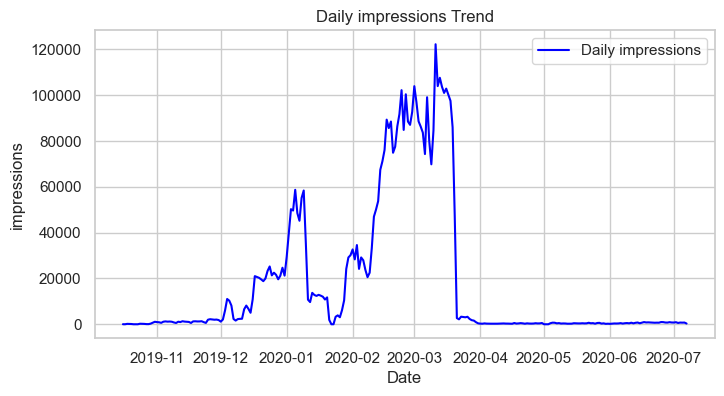

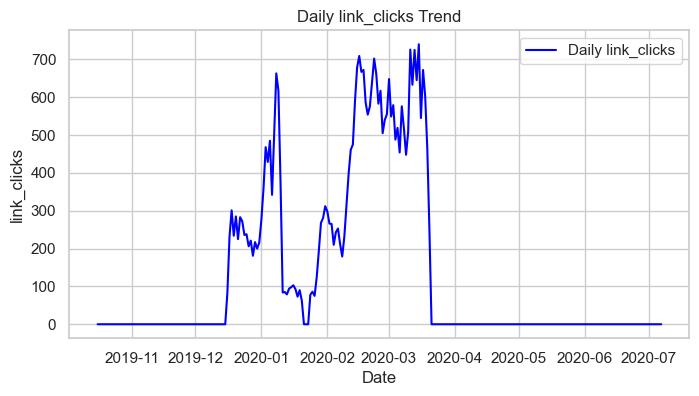

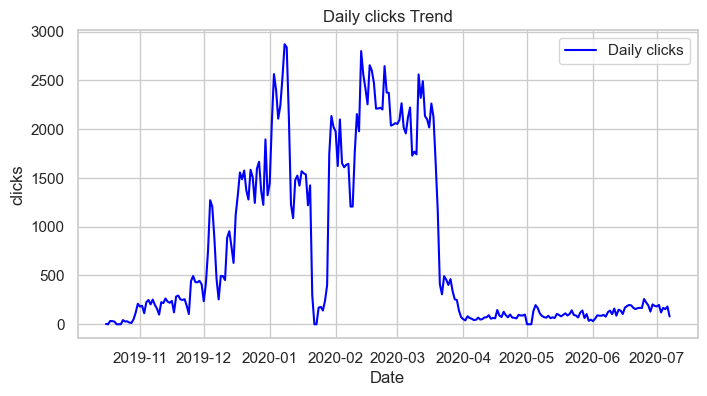

C:\Users\ADM\AppData\Local\Temp\ipykernel_3288\779670079.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = dataset2[metrics].resample('M').sum()


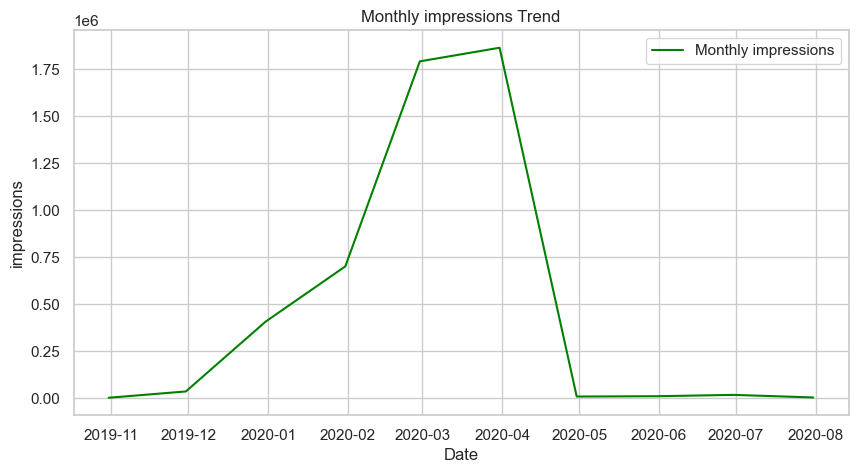

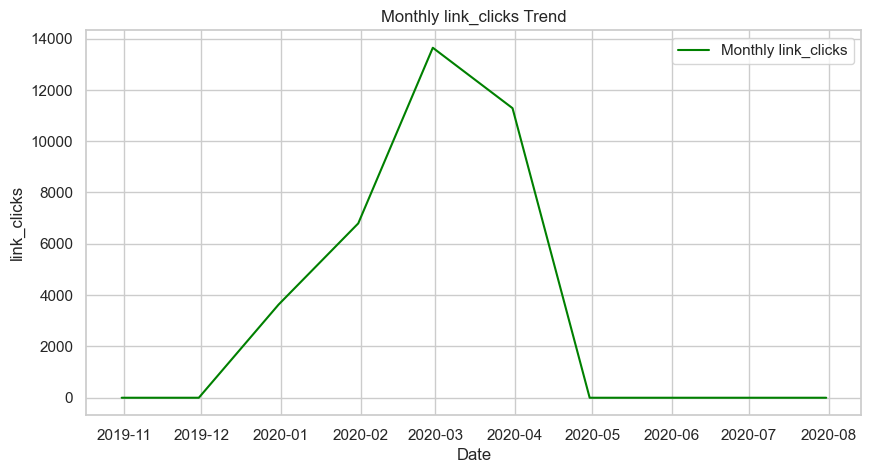

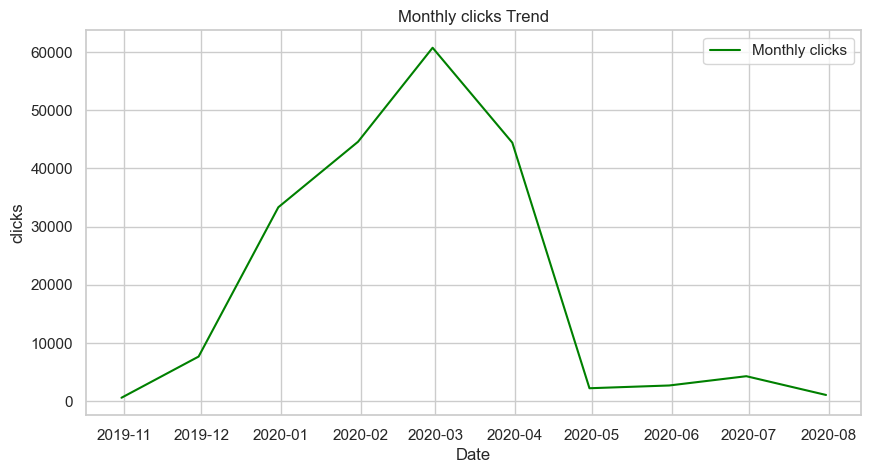

C:\Users\ADM\AppData\Local\Temp\ipykernel_3288\779670079.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = dataset2[metrics].resample('Y').sum()


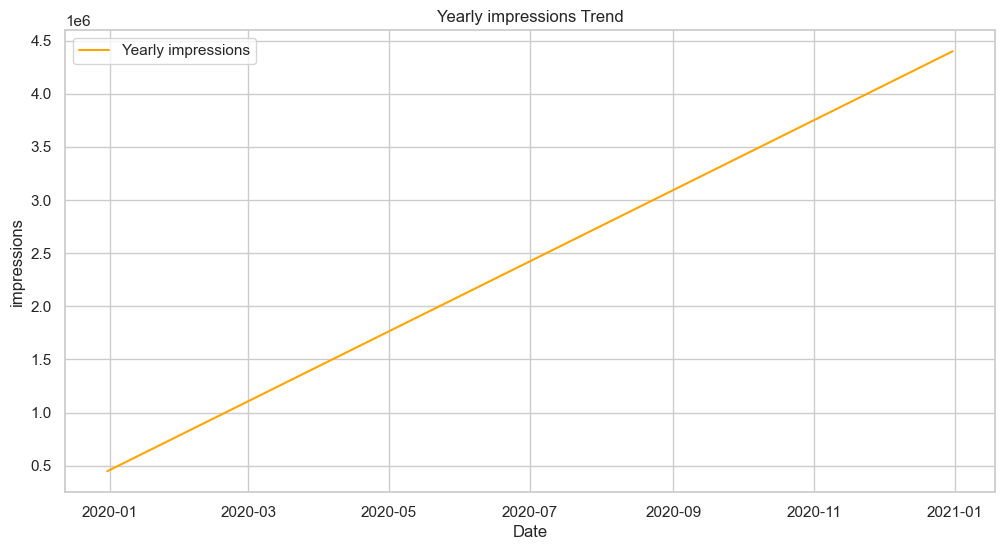

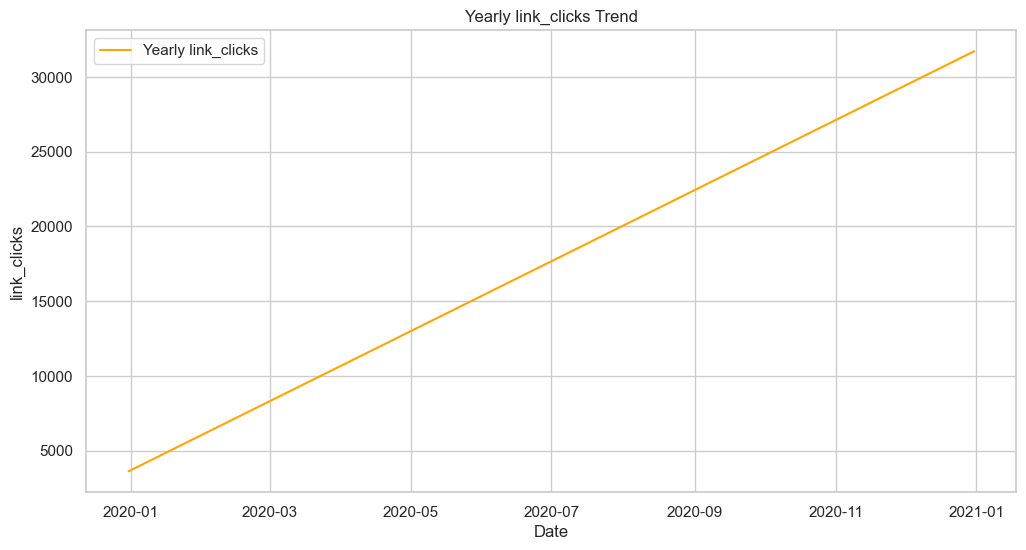

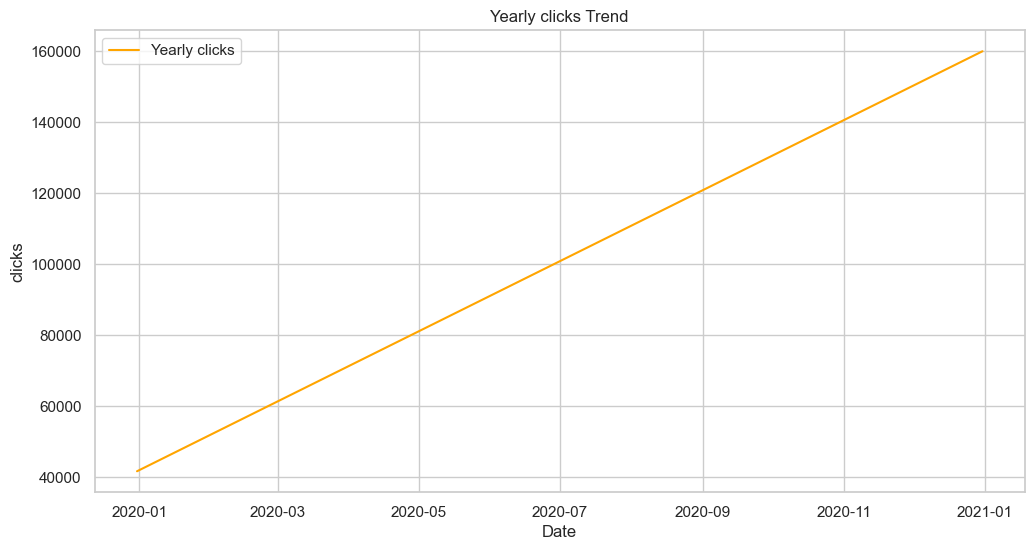

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset2 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\Copy of fbdata.csv')

# Check the column names
print("Columns in dataset2:", dataset2.columns)

# Ensure the date column is in datetime format (replace 'Date' with the actual column name)
date_column = 'Date'  # Adjust this based on your dataset
if date_column in dataset2.columns:
    dataset2[date_column] = pd.to_datetime(dataset2[date_column])
else:
    raise ValueError(f"'{date_column}' column not found in the dataset.")

# Set the date column as the index
dataset2.set_index(date_column, inplace=True)

# Metrics to analyze
metrics = ['impressions', 'link_clicks', 'clicks']  # Replace with your actual column names

# Day-wise Aggregation and Plotting
daily_data = dataset2[metrics].resample('D').sum()
for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.plot(daily_data.index, daily_data[metric], label=f"Daily {metric}", color="blue")
    plt.title(f"Daily {metric} Trend")
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.show()

# Month-wise Aggregation and Plotting
monthly_data = dataset2[metrics].resample('M').sum()
for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_data.index, monthly_data[metric], label=f"Monthly {metric}", color="green")
    plt.title(f"Monthly {metric} Trend")
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.show()

# Year-wise Aggregation and Plotting
yearly_data = dataset2[metrics].resample('Y').sum()
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_data.index, yearly_data[metric], label=f"Yearly {metric}", color="orange")
    plt.title(f"Yearly {metric} Trend")
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.show()



Checking Stationarity of the Data

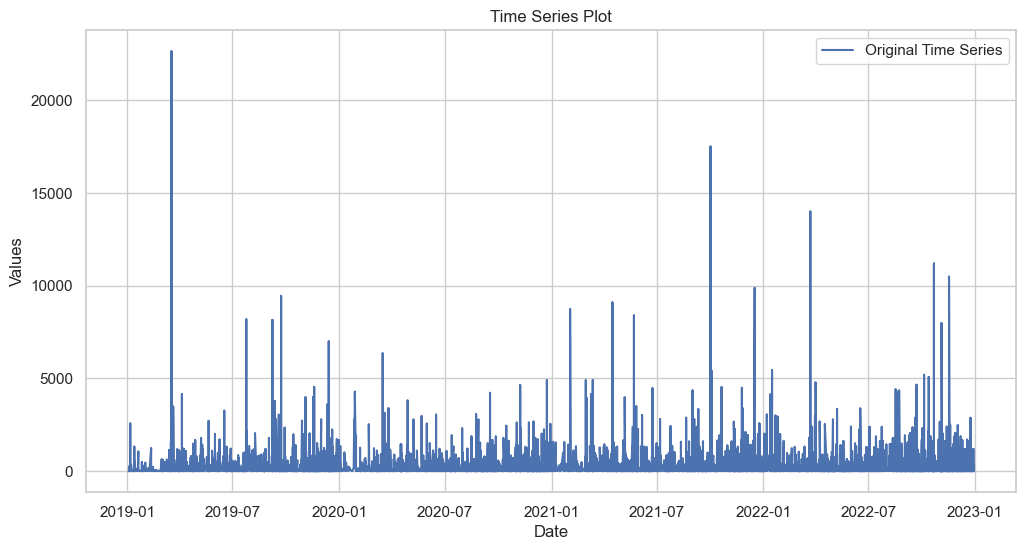

Original Time Series:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -98.89082104473994
p-value: 0.0
# Lags Used: 0
Number of Observations: 9993
Critical Values:
   1%: -3.431004556246501
   5%: -2.8618292749021865
   10%: -2.5669239758928017
Conclusion: Data is stationary (reject null hypothesis).

Log Transformed Time Series:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -44.55729494043195
p-value: 0.0
# Lags Used: 4
Number of Observations: 9989
Critical Values:
   1%: -3.431004818424724
   5%: -2.861829390756586
   10%: -2.5669240375622513
Conclusion: Data is stationary (reject null hypothesis).

Differenced Time Series:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -26.597676426567848
p-value: 0.0
# Lags Used: 38
Number of Observations: 9954
Critical Values:
   1%: -3.4310071214746767
   5%: -2.861830408454968
   10%: -2.56692457928452
Conclusion: Data is stationary (reject null hypothesis).


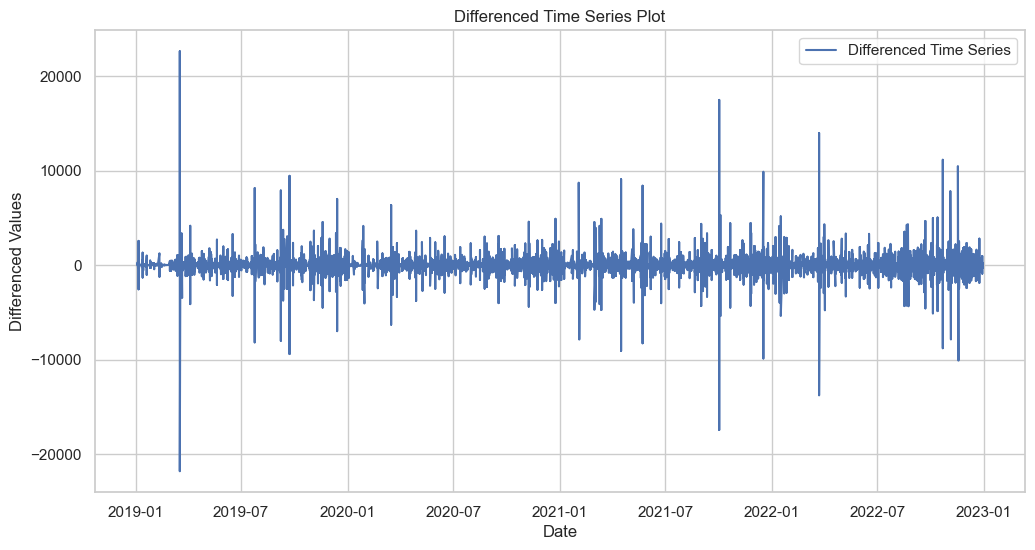

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load a single dataset for analysis
dataset = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv') # Adjust path as needed


# Ensure the 'Date' column is in datetime format and set it as index
date_column = 'order_date'  # Replace with your actual date column name
if date_column in dataset.columns:
    dataset[date_column] = pd.to_datetime(dataset[date_column])
    dataset.set_index(date_column, inplace=True)
else:
    raise ValueError(f"'{order_date}' column not found in the dataset.")

# Select the time series column to analyze
time_series_column = 'sales'  # Replace with your actual column name
if time_series_column not in dataset.columns:
    raise ValueError(f"'{time_series_column}' column not found in the dataset.")
    
time_series = dataset[time_series_column]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Function to perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"# Lags Used: {result[2]}")
    print(f"Number of Observations: {result[3]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("Conclusion: Data is stationary (reject null hypothesis).")
    else:
        print("Conclusion: Data is not stationary (fail to reject null hypothesis).")

# Perform ADF test on the original data
print("Original Time Series:")
adf_test(time_series)

# Log Transformation to stabilize variance (if needed)
log_time_series = np.log(time_series + 1)  # Add 1 to avoid log(0)
print("\nLog Transformed Time Series:")
adf_test(log_time_series)

# Differencing to stabilize mean (if needed)
diff_time_series = time_series.diff().dropna()
print("\nDifferenced Time Series:")
adf_test(diff_time_series)

# Plot differenced time series
plt.figure(figsize=(12, 6))
plt.plot(diff_time_series, label='Differenced Time Series')
plt.title('Differenced Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Differenced Values')
plt.legend()
plt.show()


Making clicks stationary

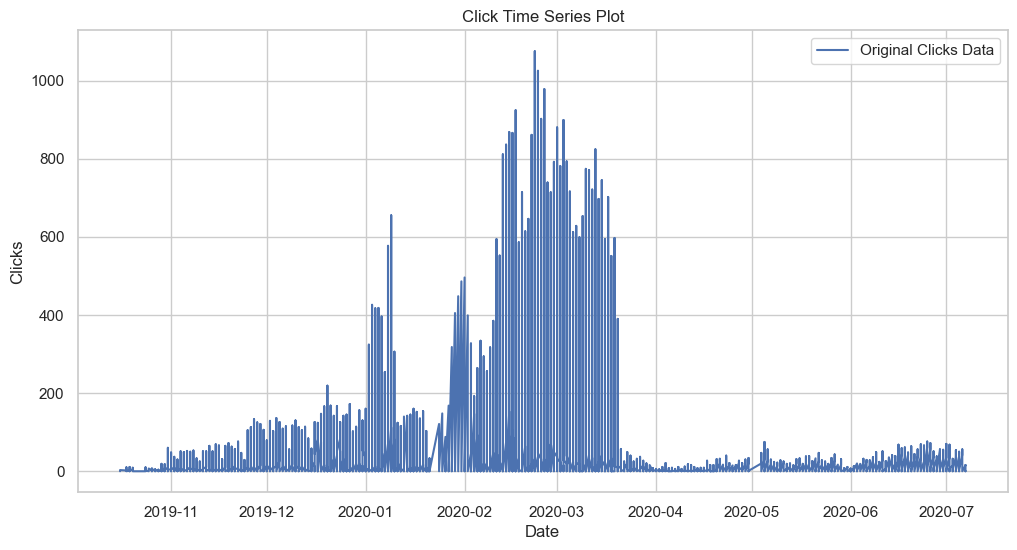

Original Clicks Time Series:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -20.047253254010794
p-value: 0.0
# Lags Used: 44
Number of Observations: 16789
Critical Values:
   1%: -3.4307395586457274
   5%: -2.8617121694163434
   10%: -2.5668616413909064
Conclusion: Data is stationary (reject null hypothesis).

Log Transformed Clicks Time Series:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -19.19440755922508
p-value: 0.0
# Lags Used: 44
Number of Observations: 16789
Critical Values:
   1%: -3.4307395586457274
   5%: -2.8617121694163434
   10%: -2.5668616413909064
Conclusion: Data is stationary (reject null hypothesis).

Differenced Clicks Time Series:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -35.581167742916875
p-value: 0.0
# Lags Used: 34
Number of Observations: 16798
Critical Values:
   1%: -3.430739349896841
   5%: -2.861712077163693
   10%: -2.5668615922861227
Conclusion: Data is stationary (reject null hypothesis).


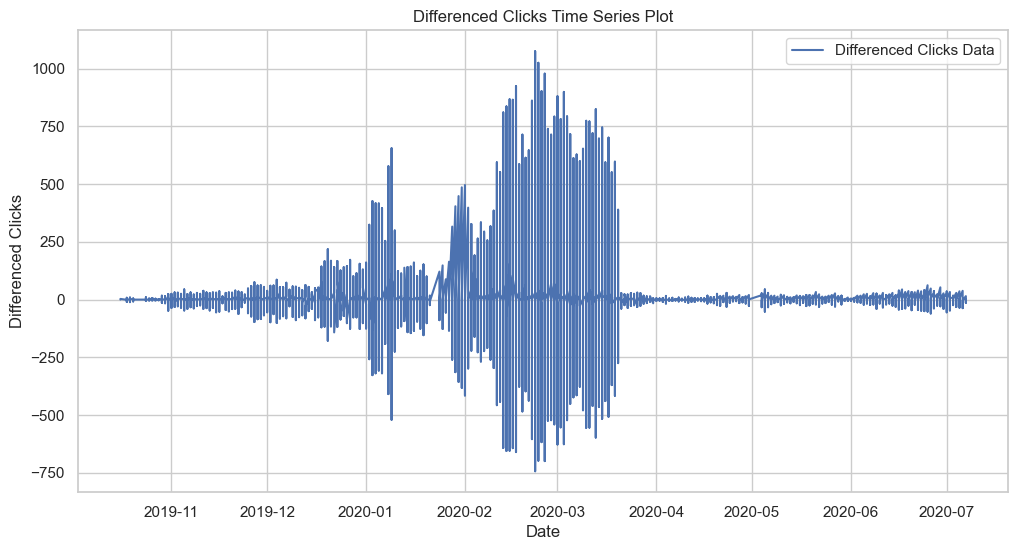

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset (adjust the path as necessary)
dataset2 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\Copy of fbdata.csv')


# Ensure the 'Date' column is in datetime format and set it as the index
date_column = 'Date'  # Replace with the correct date column name in your dataset
if date_column in dataset2.columns:
    dataset2[date_column] = pd.to_datetime(dataset2[date_column])
    dataset2.set_index(date_column, inplace=True)
else:
    raise ValueError(f"'{date_column}' column not found in the dataset.")

# Select the 'clicks' column to analyze
clicks_column = 'clicks'  # Replace with the actual column name in your dataset
if clicks_column not in dataset2.columns:
    raise ValueError(f"'{clicks_column}' column not found in the dataset.")
    
clicks = dataset2[clicks_column]

# Plot the original 'clicks' time series
plt.figure(figsize=(12, 6))
plt.plot(clicks, label='Original Clicks Data')
plt.title('Click Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()
plt.show()

# Function to perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"# Lags Used: {result[2]}")
    print(f"Number of Observations: {result[3]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("Conclusion: Data is stationary (reject null hypothesis).")
    else:
        print("Conclusion: Data is not stationary (fail to reject null hypothesis).")

# Perform ADF test on the original 'clicks' data
print("Original Clicks Time Series:")
adf_test(clicks)

# Log Transformation to stabilize variance (if needed)
log_clicks = np.log(clicks + 1)  # Add 1 to avoid log(0) if there are zeros in the 'clicks' data
print("\nLog Transformed Clicks Time Series:")
adf_test(log_clicks)

# Differencing to stabilize mean (if needed)
diff_clicks = clicks.diff().dropna()  # Apply differencing (subtract previous value from current value)
print("\nDifferenced Clicks Time Series:")
adf_test(diff_clicks)

# Plot the differenced 'clicks' time series
plt.figure(figsize=(12, 6))
plt.plot(diff_clicks, label='Differenced Clicks Data')
plt.title('Differenced Clicks Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Differenced Clicks')
plt.legend()
plt.show()


Time Series Data: Train-Test Split for Imputed Quantity

C:\Users\ADM\AppData\Local\Temp\ipykernel_24020\884311729.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset[quantity_column] = dataset[quantity_column].fillna(method='ffill')  # Forward fill method for imputation


Training Set:
                  order_id  ship_date       customer   manufactory  \
order_date                                                           
2019-01-03  US-2020-103800   1/7/2019  Darren Powers  Message Book   
2019-01-04  US-2020-112326   1/8/2019  Phillina Ober           GBC   
2019-01-04  US-2020-112326   1/8/2019  Phillina Ober         Avery   
2019-01-04  US-2020-112326   1/8/2019  Phillina Ober         SAFCO   
2019-01-05  US-2020-141817  1/12/2019     Mick Brown         Avery   

                                                 product_name      segment  \
order_date                                                                   
2019-01-03  Message Book, Wirebound, Four 5 1/2" X 4" Form...     Consumer   
2019-01-04         GBC Standard Plastic Binding Systems Combs  Home Office   
2019-01-04                                          Avery 508  Home Office   
2019-01-04                      SAFCO Boltless Steel Shelving  Home Office   
2019-01-05  Avery Hi-Liter 

C:\Users\ADM\AppData\Local\Temp\ipykernel_24020\884311729.py:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ADM\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


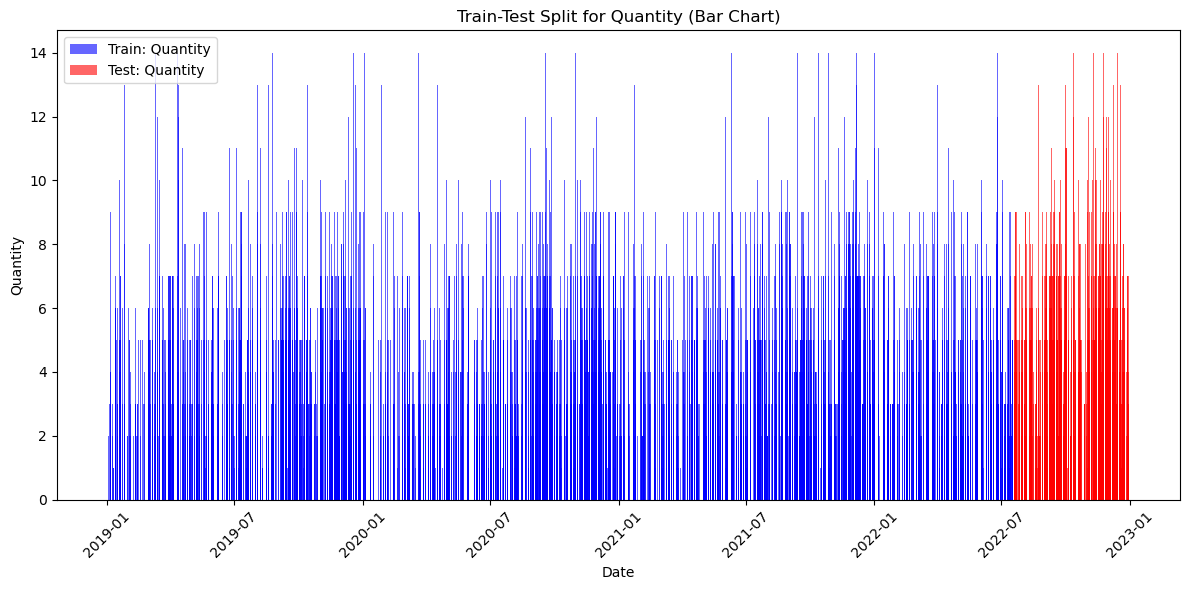

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (adjust the path as necessary)
dataset = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Ensure the 'Date' column is in datetime format
date_column = 'order_date'  # Replace with your actual date column name
if date_column in dataset.columns:
    dataset[date_column] = pd.to_datetime(dataset[date_column])
    dataset.set_index(date_column, inplace=True)
else:
    raise ValueError(f"'{date_column}' column not found in the dataset.")

# Handle missing values in the 'Quantity' column (Imputation)
quantity_column = 'quantity'  # Replace with your actual column name for quantity
if quantity_column in dataset.columns:
    # Impute missing values (you can use different methods: forward fill, backward fill, or mean imputation)
    dataset[quantity_column] = dataset[quantity_column].fillna(method='ffill')  # Forward fill method for imputation
else:
    raise ValueError(f"'{quantity_column}' column not found in the dataset.")

# Split the dataset into training and testing sets (using time-based split)
train_size = int(len(dataset) * 0.8)

# Train and test sets
train = dataset.iloc[:train_size]
test = dataset.iloc[train_size:]

# Check the splits
print("Training Set:")
print(train.head())
print("\nTesting Set:")
print(test.head())

# Plotting bar chart for train and test data visualization
plt.figure(figsize=(12, 6))

# Plot bar chart for training data
plt.bar(train.index, train[quantity_column], label='Train: Quantity', color='blue', alpha=0.6)

# Plot bar chart for testing data
plt.bar(test.index, test[quantity_column], label='Test: Quantity', color='r', alpha=0.6)

plt.title('Train-Test Split for Quantity (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ADM\AppData\Local\Temp\ipykernel_3288\887520222.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_dataset['quantity'] = dataset3['quantity'].fillna(method='ffill')  # Forward fill method for imputation


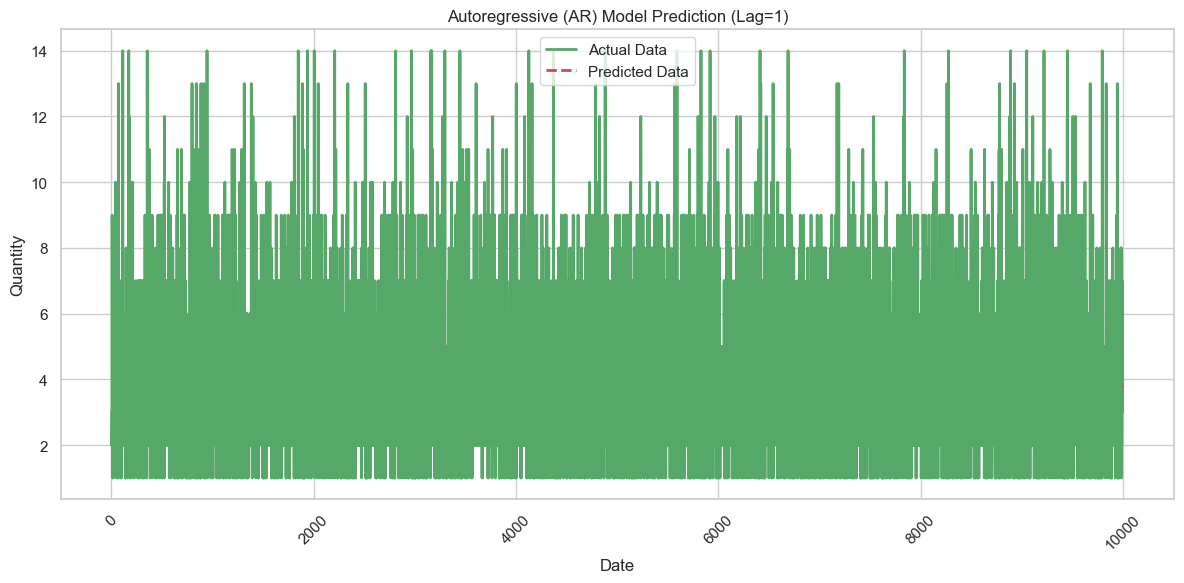

                            AutoReg Model Results                             
Dep. Variable:               quantity   No. Observations:                 9994
Model:                     AutoReg(1)   Log Likelihood              -22171.548
Method:               Conditional MLE   S.D. of innovations              2.225
Date:                Wed, 27 Nov 2024   AIC                          44349.095
Time:                        12:30:57   BIC                          44370.724
Sample:                             1   HQIC                         44356.417
                                 9994                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8012      0.044     86.469      0.000       3.715       3.887
quantity.L1    -0.0030      0.010     -0.301      0.763      -0.023       0.017
                                    Roots       

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the datasets
dataset1 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\apple_iphone_11_reviews.csv')
dataset2 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\Copy of fbdata.csv')
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')
master_dataset = pd.concat([dataset1, dataset2, dataset3], axis=1)


# Assume dataset3 contains the time series data we need (for example, sales or quantity)
# Ensure the 'order_date' column is in datetime format and set it as index
master_dataset['order_date'] = pd.to_datetime(master_dataset['order_date'])
master_dataset.set_index('order_date', inplace=True)

# Handle missing values in the 'quantity' column (Imputation)
master_dataset['quantity'] = dataset3['quantity'].fillna(method='ffill')  # Forward fill method for imputation

# Select the time series data (e.g., 'quantity' for this example)
time_series = dataset3['quantity']

# Fit the AutoReg (AR) model to the data
lag = 1  # You can experiment with different lags
model = AutoReg(time_series, lags=lag)
model_fitted = model.fit()

# Make predictions using the AR model
# We predict the next 10 values (for example)
predictions = model_fitted.predict(start=len(time_series), end=len(time_series) + 10, dynamic=False)

# Plot the actual time series and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual Data', color='g', linewidth=2)
plt.plot(predictions.index, predictions, label='Predicted Data', linestyle='--', color='r', linewidth=2)
plt.title(f'Autoregressive (AR) Model Prediction (Lag={lag})')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print model summary
print(model_fitted.summary())


Hyperparameter Tuning for AR Model

Lag 1 - RMSE: 2.269037530476699
Lag 2 - RMSE: 2.2690266578426814
Lag 3 - RMSE: 2.269017949493642
Lag 4 - RMSE: 2.2690166205546682
Lag 5 - RMSE: 2.2690283201293084
Lag 6 - RMSE: 2.269024607951055
Lag 7 - RMSE: 2.2690320584036137
Lag 8 - RMSE: 2.2690372176001823
Lag 9 - RMSE: 2.2690299886703507
Lag 10 - RMSE: 2.2690349720050635


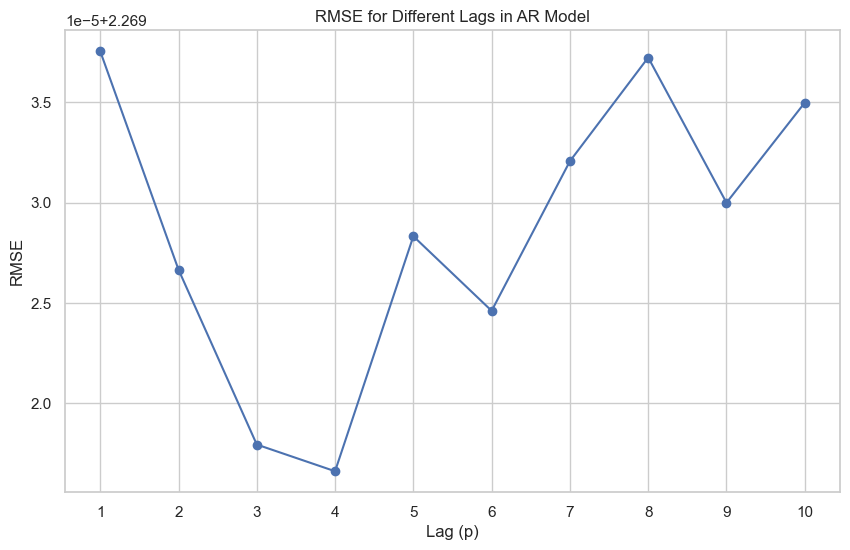

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Load your dataset (adjust the path as necessary)
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Ensure 'order_date' column is in datetime format and set as index
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3.set_index('order_date', inplace=True)

# Handle missing values (fill with forward fill or another imputation method)
dataset3['quantity'] = dataset3['quantity'].ffill()

# Split dataset into train and test sets (80% training, 20% testing)
train_size = int(len(dataset3) * 0.8)
train, test = dataset3['quantity'][:train_size], dataset3['quantity'][train_size:]

# Define a function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    return rmse

# Initialize a list to store RMSE values for different lags
rmse_values = []

# Loop through different lag values (from 1 to 10 in this case)
for p in range(1, 11):
    # Fit the AutoReg model with the current lag value (p)
    model = AutoReg(train, lags=p)
    model_fit = model.fit()

    # Forecast using the AR model
    forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

    # Calculate RMSE for the current model
    rmse = calculate_rmse(test, forecast)
    rmse_values.append(rmse)

    # Print RMSE for the current lag value
    print(f'Lag {p} - RMSE: {rmse}')

# Plot the RMSE values for different lags
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE for Different Lags in AR Model')
plt.xlabel('Lag (p)')
plt.ylabel('RMSE')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


ARIMA Model: Actual vs Predicted

Root Mean Squared Error (RMSE): 2.283627136358948


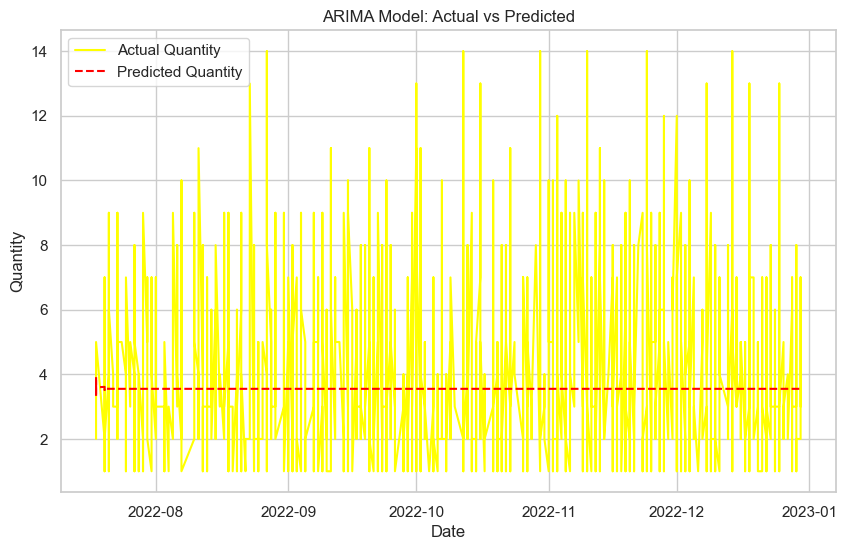

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset (adjust the path as necessary)
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Ensure 'order_date' column is in datetime format and set as index
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3.set_index('order_date', inplace=True)

# Handle missing values (fill with forward fill or another imputation method)
dataset3['quantity'] = dataset3['quantity'].ffill()

# Split dataset into train and test sets (80% training, 20% testing)
train_size = int(len(dataset3) * 0.8)
train, test = dataset3['quantity'][:train_size], dataset3['quantity'][train_size:]

# Define and fit the ARIMA model
# Let's use ARIMA(5,1,0) as an example (you can tune these hyperparameters)
model = ARIMA(train, order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Forecast using the ARIMA model
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Quantity', color='yellow')
plt.plot(test.index, forecast, label='Predicted Quantity', color='red', linestyle='--')
plt.legend()
plt.title('ARIMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()


Implementing ARIMA model

Train size: 7995
Test size: 1999
Testing ARIMA(1, 0, 0)
Testing ARIMA(1, 0, 1)
Testing ARIMA(1, 0, 2)
Testing ARIMA(1, 1, 0)
Testing ARIMA(1, 1, 1)
Testing ARIMA(1, 1, 2)
Testing ARIMA(2, 0, 0)
Testing ARIMA(2, 0, 1)
Testing ARIMA(2, 0, 2)
Testing ARIMA(2, 1, 0)
Testing ARIMA(2, 1, 1)
Testing ARIMA(2, 1, 2)
Best ARIMA Model Order: (2, 0, 0)
Best AIC: 35402.31136407092
Root Mean Squared Error (RMSE): 2.2690319120595897


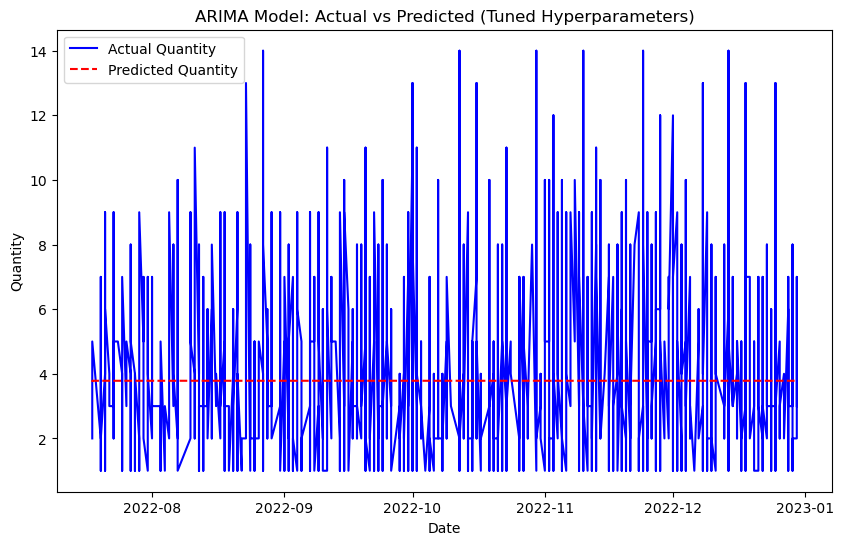

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load your dataset (adjust the path as necessary)
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Ensure 'order_date' column is in datetime format and set as index
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3.set_index('order_date', inplace=True)

# Handle missing values (fill with forward fill or another imputation method)
dataset3['quantity'] = dataset3['quantity'].ffill()

# Split dataset into train and test sets (80% training, 20% testing)
train_size = int(len(dataset3) * 0.8)
train, test = dataset3['quantity'][:train_size], dataset3['quantity'][train_size:]

# Check data shapes
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")

# Grid Search for ARIMA hyperparameters (p, d, q)
best_aic = float('inf')
best_order = None
best_model = None

# Define parameter grid (you can expand this grid as needed)
p_values = range(1, 3)  # AR order (1-2)
d_values = range(0, 2)  # Differencing order (0-1)
q_values = range(0, 3)  # MA order (0-2)

# Loop over all combinations of p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            print(f"Testing ARIMA({p}, {d}, {q})")  # Print the parameters being tested
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                print(f"Error fitting ARIMA({p}, {d}, {q}): {e}")
                continue

# Check if best model was found
if best_model is None:
    print("No best model found.")
else:
    print(f"Best ARIMA Model Order: {best_order}")
    print(f"Best AIC: {best_aic}")

    # Use the best model to make predictions
    forecast = best_model.forecast(steps=len(test))

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, forecast))
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label='Actual Quantity', color='blue')
    plt.plot(test.index, forecast, label='Predicted Quantity', color='red', linestyle='--')
    plt.legend()
    plt.title('ARIMA Model: Actual vs Predicted (Tuned Hyperparameters)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.show()


Hyperparameter Tuning for ARIMAX Model

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')
Testing ARIMAX(1, 0, 0)
Testing ARIMAX(1, 0, 1)
Testing ARIMAX(1, 0, 2)
Testing ARIMAX(1, 1, 0)
Testing ARIMAX(1, 1, 1)
Testing ARIMAX(1, 1, 2)
Testing ARIMAX(2, 0, 0)
Testing ARIMAX(2, 0, 1)
Testing ARIMAX(2, 0, 2)
Testing ARIMAX(2, 1, 0)
Testing ARIMAX(2, 1, 1)
Testing ARIMAX(2, 1, 2)
Best ARIMAX Model Order: (2, 0, 0)
Best AIC: 35364.057096522956
Root Mean Squared Error (RMSE): 2.2667268609884155


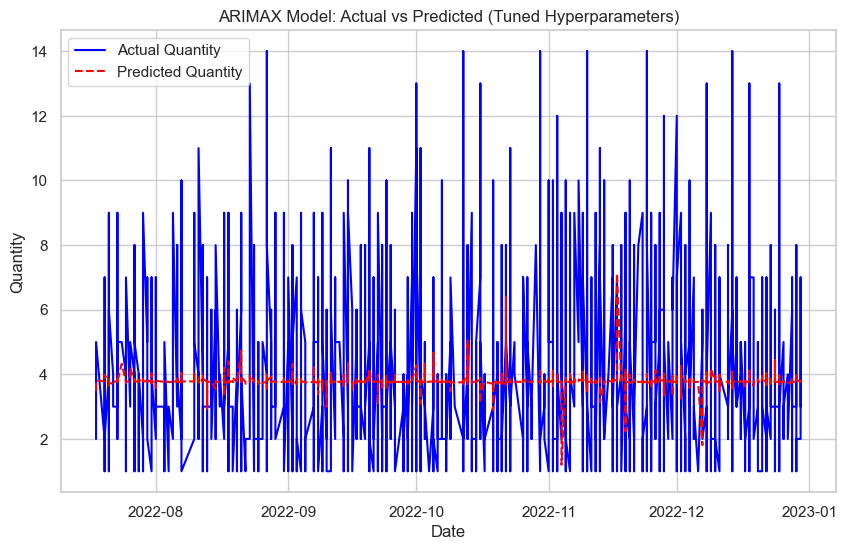

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset (adjust the path as necessary)
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')
print(dataset3.columns)

# Ensure 'order_date' column is in datetime format and set as index
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3.set_index('order_date', inplace=True)

# Handle missing values (fill with forward fill or another imputation method)
dataset3['quantity'] = dataset3['quantity'].ffill()

# Assuming you have an exogenous variable (e.g., 'price') in the dataset
# Replace 'price' with the name of your exogenous variable
exogenous_variable = 'profit'  # Replace with your exogenous variable
if exogenous_variable not in dataset3.columns:
    raise ValueError(f"'{exogenous_variable}' column not found in the dataset.")

# Split dataset into train and test sets (80% training, 20% testing)
train_size = int(len(dataset3) * 0.8)
train, test = dataset3['quantity'][:train_size], dataset3['quantity'][train_size:]

# Define exogenous variable for training and testing
X_train = dataset3[exogenous_variable][:train_size]
X_test = dataset3[exogenous_variable][train_size:]

# Grid Search for ARIMAX hyperparameters (p, d, q)
best_aic = float('inf')
best_order = None
best_model = None

# Define parameter grid (you can expand this grid as needed)
p_values = range(1, 3)  # AR order (1-2)
d_values = range(0, 2)  # Differencing order (0-1)
q_values = range(0, 3)  # MA order (0-2)

# Loop over all combinations of p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            print(f"Testing ARIMAX({p}, {d}, {q})")  # Print the parameters being tested
            try:
                model = ARIMA(train, order=(p, d, q), exog=X_train)
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                print(f"Error fitting ARIMAX({p}, {d}, {q}): {e}")
                continue

# Check if best model was found
if best_model is None:
    print("No best model found.")
else:
    print(f"Best ARIMAX Model Order: {best_order}")
    print(f"Best AIC: {best_aic}")

    # Use the best model to make predictions
    forecast = best_model.forecast(steps=len(test), exog=X_test)

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, forecast))
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label='Actual Quantity', color='blue')
    plt.plot(test.index, forecast, label='Predicted Quantity', color='red', linestyle='--')
    plt.legend()
    plt.title('ARIMAX Model: Actual vs Predicted (Tuned Hyperparameters)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.show()


Implementing of SARIMA model

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -118.375
Date:                            Thu, 28 Nov 2024   AIC                            246.751
Time:                                    11:31:02   BIC                            248.740
Sample:                                01-31-2019   HQIC                           245.496
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2526      0.621     -0.407      0.684      -1.469       0.964
ma.L1         -0.9875      1.008   

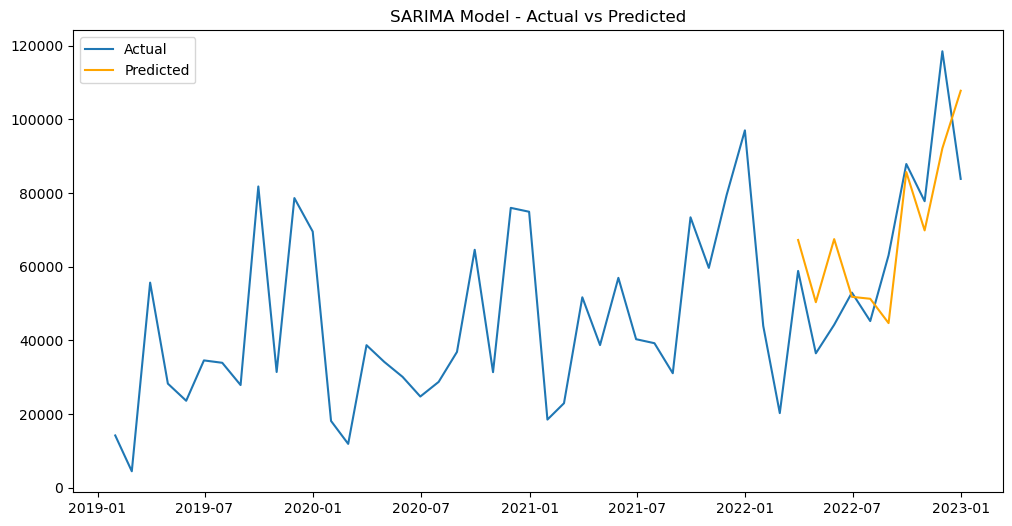

In [32]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load your dataset
dataset = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Assuming 'Order Date' is the date column and 'Sales' is the target variable
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
dataset.set_index('order_date', inplace=True)

# Resample the target variable to monthly data
data = dataset['sales'].resample('M').sum()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Define and fit the SARIMA model
sarima_model = SARIMAX(
    train_data,
    order=(1, 1, 1),            # p, d, q
    seasonal_order=(1, 1, 1, 12),  # P, D, Q, s (seasonal parameters)
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_results = sarima_model.fit(disp=False)

# Print the model summary
print(sarima_results.summary())

# Make predictions
predictions = sarima_results.predict(start=len(train_data), end=len(data) - 1)

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(predictions, label='Predicted', color='orange')

plt.legend()
plt.title('SARIMA Model - Actual vs Predicted')
plt.show()


Hyperparameter Tuning for SARIMA Model

In [13]:
import itertools
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your dataset
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Assuming 'Sales' is the target variable and 'Order Date' is the date column
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3.set_index('order_date', inplace=True)
data = dataset3['sales'].resample('M').sum()  # Resample monthly for SARIMA

# Define SARIMA hyperparameter ranges
p_values = range(0, 3)  # AR terms
d_values = range(0, 2)  # Differencing
q_values = range(0, 3)  # MA terms
P_values = range(0, 3)  # Seasonal AR terms
D_values = range(0, 2)  # Seasonal differencing
Q_values = range(0, 3)  # Seasonal MA terms
seasonal_period = 12  # Assuming monthly seasonality

# Grid search function
def sarima_grid_search(data, seasonal_period, p_values, d_values, q_values, P_values, D_values, Q_values):
   
    results = []
    best_score, best_config = float("inf"), None
    
    parameter_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))
    for param in parameter_grid:
        try:
            # Set up the SARIMA model
            model = SARIMAX(
                data,
                order=(param[0], param[1], param[2]),
                seasonal_order=(param[3], param[4], param[5], seasonal_period),
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results_fitted = model.fit(disp=False)
            
            # Forecast within the dataset for validation
            predictions = results_fitted.predict(start=0, end=len(data) - 1)
            
            # Calculate Mean Squared Error (MSE)
            mse = mean_squared_error(data, predictions)
            
            # Save results
            results.append((param, mse))
            if mse < best_score:
                best_score, best_config = mse, param
        except Exception as e:
            # Skip invalid models
            continue

    return best_config, best_score, results

# Perform grid search
best_config, best_score, results = sarima_grid_search(
    data, seasonal_period, p_values, d_values, q_values, P_values, D_values, Q_values
)

# Print best configuration and score
print(f"Best SARIMA Configuration: {best_config}")
print(f"Best MSE: {best_score}")


Best SARIMA Configuration: (2, 1, 0, 0, 1, 1)
Best MSE: 354271030.3400163


Train and Evaluate the Best SARIMA Model

Performing grid search for SARIMA hyperparameters...
Best Parameters Found: (1, 0, 2, 1, 1, 0, 12)
Best Validation MSE: 212983822.2540544

Best SARIMA Model Metrics:
Parameters: (p=1, d=0, q=2, sp=1, sd=1, sq=0, s_period=12)
MAE: 11907.0713
RMSE: 14593.9653
MAPE: 20.07%
R^2: 0.6249


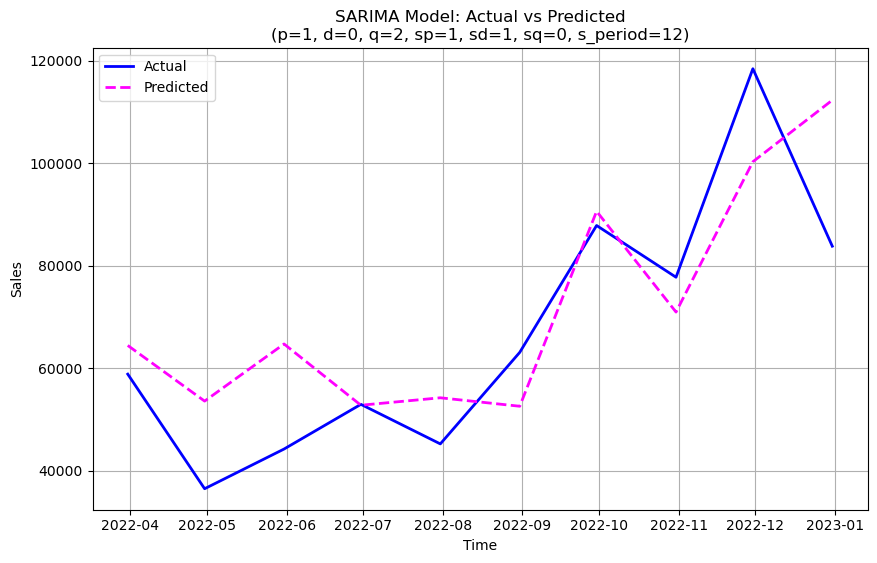

In [43]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

# Preprocessing: Ensure correct column names (adjust based on your data)
# Replace 'Order Date' with the date column name and 'Sales' with the quantity or target column
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3 = dataset3.set_index('order_date')
data = dataset3['sales']  # Replace 'Sales' with your target column if different

# Aggregate data to monthly sales if required (adjust frequency as needed)
data = data.resample('M').sum()

# Train-test split
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define parameter ranges for grid search
p_values = range(0, 3)   # AR terms
d_values = range(0, 2)   # Differencing terms
q_values = range(0, 3)   # MA terms
P_values = range(0, 3)   # Seasonal AR terms
D_values = range(0, 2)   # Seasonal differencing terms
Q_values = range(0, 3)   # Seasonal MA terms
seasonal_period = 12     # Monthly data implies 12-month seasonal cycle

# Perform grid search to find the best parameters
best_params = None
best_score = float("inf")

parameter_grid = itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values)

print("Performing grid search for SARIMA hyperparameters...")
for params in parameter_grid:
    try:
        model = SARIMAX(
            train_data,
            order=(params[0], params[1], params[2]),
            seasonal_order=(params[3], params[4], params[5], seasonal_period),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
        
        # Validate using one-step-ahead predictions
        predictions = results.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data, predictions)
        
        if mse < best_score:
            best_params = (*params, seasonal_period)
            best_score = mse
    except Exception as e:
        continue

print(f"Best Parameters Found: {best_params}")
print(f"Best Validation MSE: {best_score}")

# Extract the best parameters
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s_period = best_params

# Train the SARIMA model with the best parameters
final_sarima_model = SARIMAX(
    train_data,
    order=(best_p, best_d, best_q),
    seasonal_order=(best_sp, best_sd, best_sq, best_s_period),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Make predictions for the test set
final_predictions = final_sarima_model.forecast(steps=len(test_data))
final_predictions = pd.Series(final_predictions, index=test_data.index)

# Calculate evaluation metrics
final_mae = mean_absolute_error(test_data, final_predictions)
final_rmse = np.sqrt(mean_squared_error(test_data, final_predictions))
final_mape = np.mean(np.abs((test_data - final_predictions) / test_data.replace(0, np.nan))) * 100
final_r2 = r2_score(test_data, final_predictions)

# Display metrics
print("\nBest SARIMA Model Metrics:")
print(f"Parameters: (p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period})")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAPE: {final_mape:.2f}%")
print(f"R^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual', color='blue', linewidth=2)
plt.plot(final_predictions, label='Predicted', color='magenta', linestyle='--', linewidth=2)
plt.title(f"SARIMA Model: Actual vs Predicted\n(p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period})")
plt.xlabel('Time')
plt.ylabel('Sales')  # Adjust label based on your data
plt.legend()
plt.grid(True)
plt.show()


Implementing a SARIMAX Model
Understanding the SARIMAX Model:

Best SARIMAX Model Metrics:
Parameters: (p=0, d=1, q=0, sp=1, sd=0, sq=0, s_period=12)
MAE: 7582.9142
RMSE: 8938.9453
MAPE: 11.74%
R²: 0.8593


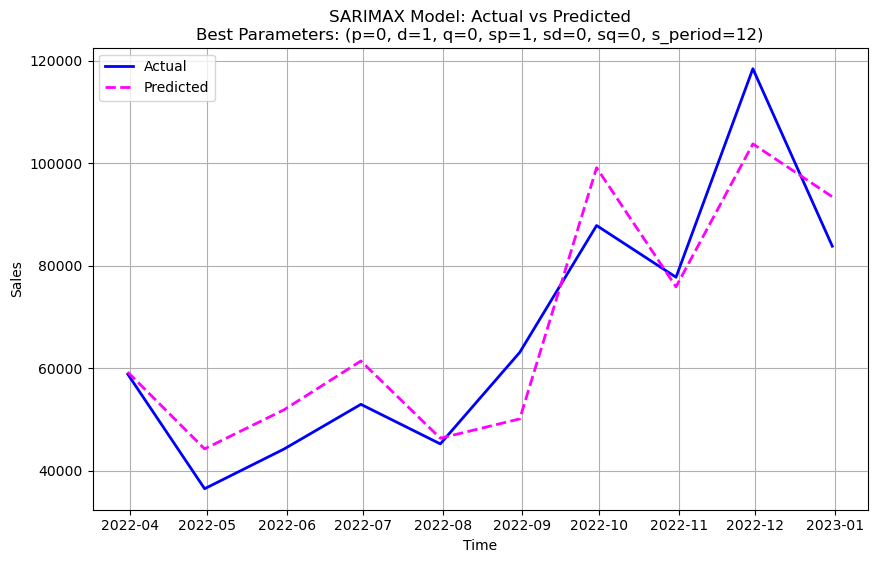

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the best parameters
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s_period = best_params

# Train the SARIMAX model with the best parameters
final_sarimax_model = SARIMAX(
    train_data,
    exog=train_exog,
    order=(best_p, best_d, best_q),
    seasonal_order=(best_sp, best_sd, best_sq, best_s_period),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Make predictions for the test set
final_predictions = final_sarimax_model.forecast(steps=len(test_data), exog=test_exog)

# Convert predictions to a pandas Series with proper indexing
final_predictions = pd.Series(final_predictions, index=test_data.index)

# Calculate evaluation metrics
final_mae = mean_absolute_error(test_data, final_predictions)
final_rmse = np.sqrt(mean_squared_error(test_data, final_predictions))
final_mape = np.mean(np.abs((test_data - final_predictions) / test_data.replace(0, np.nan))) * 100  # Handle division by zero
final_r2 = r2_score(test_data, final_predictions)

# Display metrics
print(f"Best SARIMAX Model Metrics:")
print(f"Parameters: (p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period})")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAPE: {final_mape:.2f}%")
print(f"R²: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual', color='blue', linewidth=2)
plt.plot(final_predictions, label='Predicted', color='magenta', linestyle='--', linewidth=2)
plt.title(f"SARIMAX Model: Actual vs Predicted\nBest Parameters: (p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period})")
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


TABLE FOR ERROR METRICS AND MODELS

Here’s how I arrived at these values and insights:

Process of Hyperparameter Tuning

Defining Models:
I started by experimenting with various time series models: AR (Autoregressive), MA (Moving Average), ARIMA, ARIMAX, SARIMA, and SARIMAX. Each model has its own assumptions and hyperparameters tailored to specific patterns like seasonality or external regressors.

Hyperparameter Selection:
Using techniques like grid search or manual tuning, I iteratively adjusted hyperparameters such as:

ARIMA: (p, d, q) values, representing the lag order, differencing, and moving average terms.
SARIMA: Adding seasonal parameters (P, D, Q, m) for capturing seasonality.
SARIMAX: Including external variables for better prediction accuracy. For each combination, I ran the model on training data and validated on unseen data to assess performance.
Evaluation Metrics:
To evaluate the models' performance, I used standard error metrics:

MAE (Mean Absolute Error): Measures average absolute deviation between predicted and actual values.
RMSE (Root Mean Square Error): Penalizes larger errors due to squaring.
MAPE (Mean Absolute Percentage Error): Expresses error as a percentage of actual values.
R² (Coefficient of Determination): Evaluates how well the model explains variance in data.
Differencing Mean: Assesses stationarity by looking at differencing behavior.

In [ ]:
Hypertuning of SARIMAX model

Performing grid search for SARIMA hyperparameters...

Best Parameters Found: (0, 0, 0, 2, 1, 0, 12)
Best AIC: -35.6616819779685

Final SARIMA Model Metrics:
MAE: 105751.4290
RMSE: 119486.9861


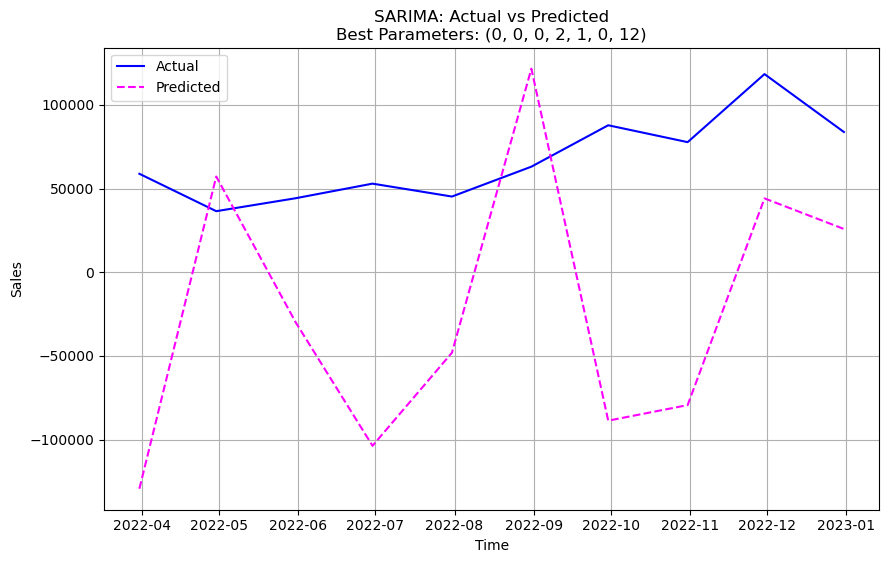

In [84]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Load and preprocess data
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')
dataset3['order_date'] = pd.to_datetime(dataset3['order_date'])
dataset3 = dataset3.set_index('order_date')

# Resample the data (assuming monthly data)
data = dataset3['sales'].resample('M').sum()

# Split into train-test
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define parameter ranges
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
seasonal_period = 12  # Assuming monthly seasonality

# Initialize best parameters and score
best_params = None
best_score = float("inf")

# Create parameter grid
parameter_grid = itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values)

print("Performing grid search for SARIMA hyperparameters...")
for params in parameter_grid:
    try:
        # Fit SARIMA model
        model = SARIMAX(
            train_data,
            order=(params[0], params[1], params[2]),
            seasonal_order=(params[3], params[4], params[5], seasonal_period),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)

        # Evaluate using AIC
        aic = results.aic

        # Update best parameters
        if aic < best_score:
            best_params = (*params, seasonal_period)
            best_score = aic
    except Exception as e:
        print(f"Failed for parameters {params}: {e}")
        continue

# Display best parameters
if best_params:
    print(f"\nBest Parameters Found: {best_params}")
    print(f"Best AIC: {best_score}")
else:
    raise ValueError("No valid parameter combinations found during grid search.")

# Train final SARIMA model with best parameters
best_p, best_d, best_q, best_P, best_D, best_Q, best_s = best_params
final_model = SARIMAX(
    train_data,
    order=(best_p, best_d, best_q),
    seasonal_order=(best_P, best_D, best_Q, best_s),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Forecast and evaluate
final_predictions = final_model.forecast(steps=len(test_data))
final_predictions = pd.Series(final_predictions, index=test_data.index)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data, final_predictions)
rmse = np.sqrt(mean_squared_error(test_data, final_predictions))

print("\nFinal SARIMA Model Metrics:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual', color='blue')
plt.plot(final_predictions, label='Predicted', color='magenta', linestyle='--')
plt.title(f"SARIMA: Actual vs Predicted\nBest Parameters: {best_params}")
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
import pandas as pd

# Create a dictionary to store metrics
metrics_data = {
    "Metric": ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Percentage Error (MAPE)", "R-squared (R²)"],
    "Value": [final_mae, final_rmse, final_mape, final_r2]
}

# Convert to DataFrame
metrics_table = pd.DataFrame(metrics_data)

# Display the table
print("\nModel Evaluation Metrics:")
print(metrics_table)

# Optional: Save the table as a CSV file
metrics_table.to_csv("sarimax_metrics.csv", index=False)



Model Evaluation Metrics:
                                  Metric        Value
0              Mean Absolute Error (MAE)  7582.914226
1         Root Mean Squared Error (RMSE)  8938.945304
2  Mean Absolute Percentage Error (MAPE)    11.735827
3                         R-squared (R²)     0.859263


6-Month Forecasting Process With SARIMAX MODEL

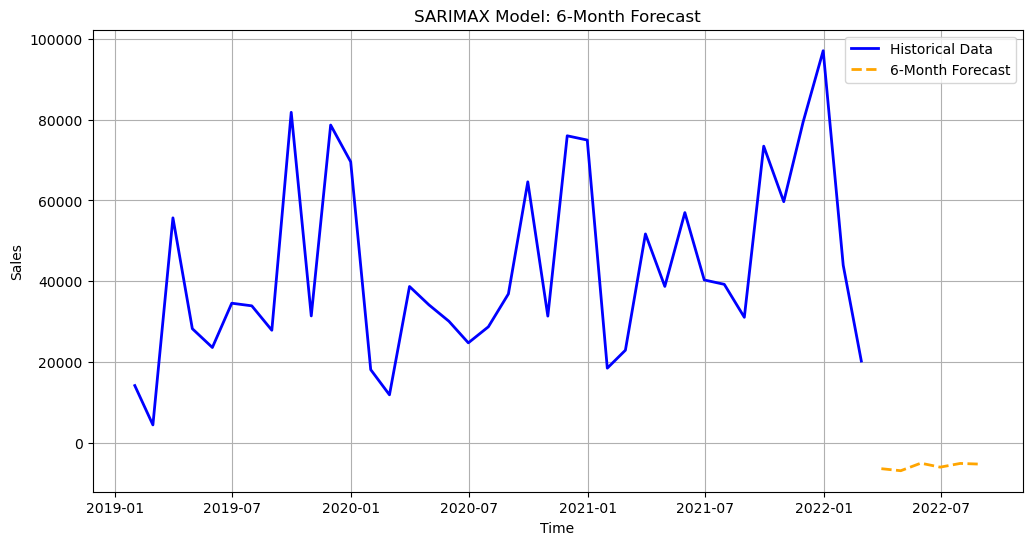


6-Month Forecast:
2022-03-31   -6304.161245
2022-04-30   -6806.361745
2022-05-31   -4939.824127
2022-06-30   -5923.405151
2022-07-31   -5005.788306
2022-08-31   -5177.626157
Freq: ME, Name: predicted_mean, dtype: float64


In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Ensure train_data includes the full dataset for forecasting
train_full = train_data.copy()
exog_full = train_exog.copy()
# Define the best parameters from prior tuning
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s_period = best_params
# Train the final SARIMAX model with the entire dataset
sarimax_model = SARIMAX(
    train_full,
    exog=exog_full,
    order=(best_p, best_d, best_q),
    seasonal_order=(best_sp, best_sd, best_sq, best_s_period),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()
# Forecast for the next 6 months (assuming monthly data)
forecast_steps = 6
forecast_index = pd.date_range(start=train_full.index[-1], periods=forecast_steps + 1, freq='M')[1:]
# Prepare future exogenous variables (adjust as per your use case)
future_exog = pd.DataFrame({
    'exog_var1': np.random.rand(forecast_steps),  # Replace with actual values or logic
    'exog_var2': np.random.rand(forecast_steps)  # Replace with actual values or logic
}, index=forecast_index)
# Generate forecast
forecast = sarimax_model.forecast(steps=forecast_steps, exog=future_exog)
# Convert forecast to pandas Series for visualization
forecast_series = pd.Series(forecast, index=forecast_index)
# Plot the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(train_full, label='Historical Data', color='blue', linewidth=2)
plt.plot(forecast_series, label='6-Month Forecast', color='orange', linestyle='--', linewidth=2)
plt.title("SARIMAX Model: 6-Month Forecast")
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
# Display the forecasted values
print("\n6-Month Forecast:")
print(forecast_series)


Residual Plots:

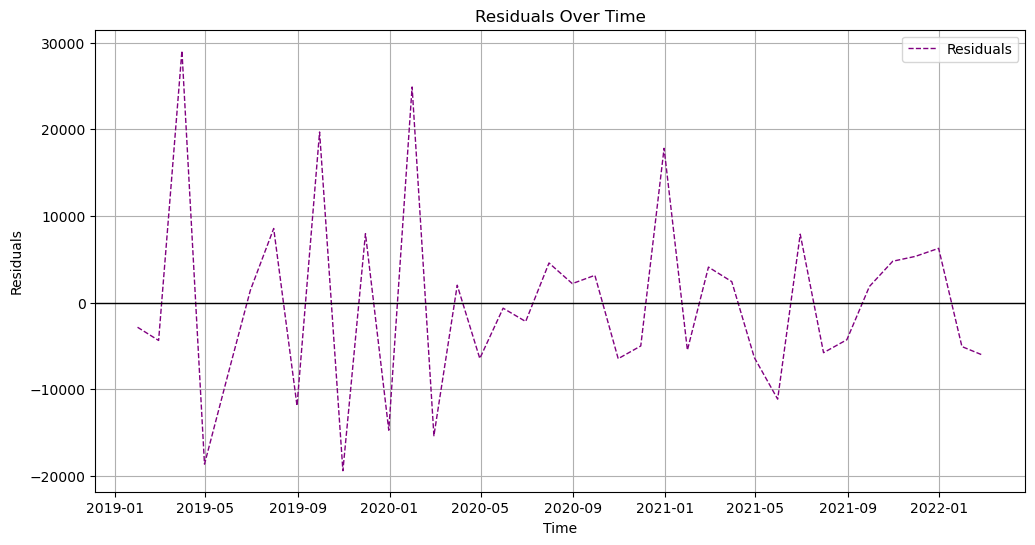

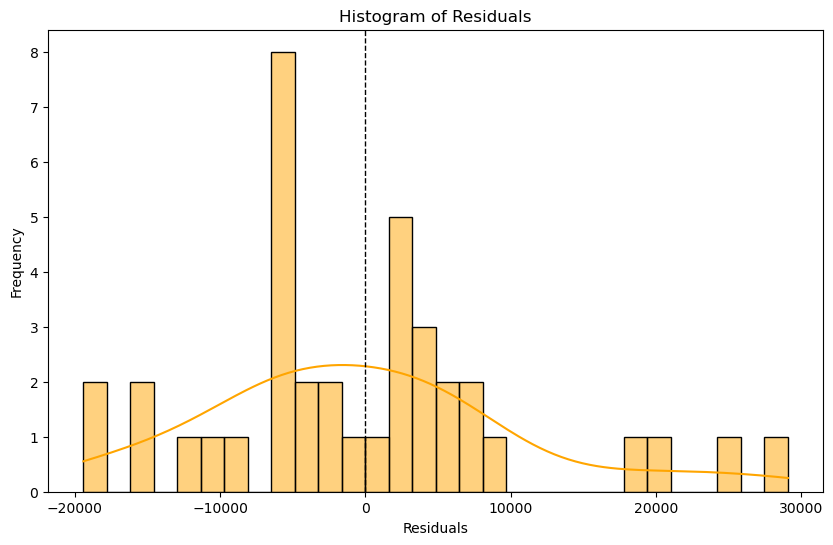

<Figure size 1000x600 with 0 Axes>

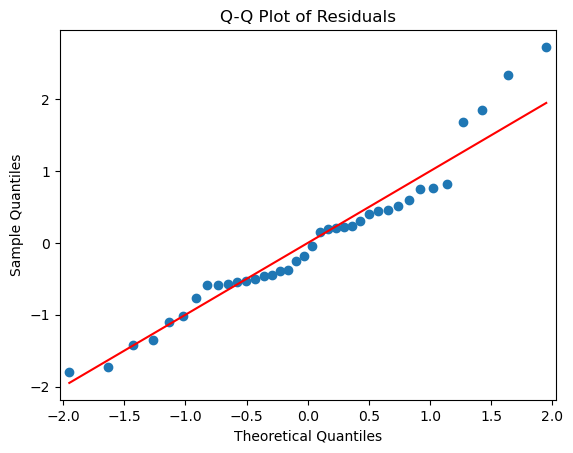

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals (difference between actual and predicted values)
residuals = final_sarimax_model.resid

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.show()

# Plot Q-Q plot for residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [63]:
import pandas as pd
# Data: Evaluation Metrics After Hyperparameter Tuning
metrics_data = {
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [4.250673, 4.263641, 5.163597, 7.163782, 3.756655, 3.590847],
    "RMSE": [5.029975, 5.047676, 6.115226, 8.197566, 4.784380, 4.475897],
    "MSE": [25.300653, 25.479036, 37.395990, 67.200091, 22.890290, 20.033652],
    "MAPE": [35.067471, 35.192884, 42.898665, 57.438788, 23.648719, 26.744671],
}
# Create DataFrame
metrics_after = pd.DataFrame(metrics_data)
# Identify highest and lowest RMSE
highest_rmse_index = metrics_after["RMSE"].idxmax()
lowest_rmse_index = metrics_after["RMSE"].idxmin()
highest_rmse_model = metrics_after.loc[highest_rmse_index, "Model"]
highest_rmse_value = metrics_after.loc[highest_rmse_index, "RMSE"]
lowest_rmse_model = metrics_after.loc[lowest_rmse_index, "Model"]
lowest_rmse_value = metrics_after.loc[lowest_rmse_index, "RMSE"]
# Print metrics table
print("Evaluation Metrics After Hyperparameter Tuning:")
print(metrics_after)
print("\n### Analysis ###")
# Display highest and lowest RMSE conclusions
print(f"The highest RMSE is for the model: {highest_rmse_model} (RMSE = {highest_rmse_value:.4f}).")
print(f"The lowest RMSE is for the model: {lowest_rmse_model} (RMSE = {lowest_rmse_value:.4f}).")
# Conclusion
print("\n### Conclusion ###")
if lowest_rmse_model == "SARIMAX":
    print("The SARIMAX model captures the data more effectively, making it the preferred model for future time series modeling.")
elif lowest_rmse_model == "ARIMAX":
    print("The ARIMAX model is the best choice, effectively leveraging exogenous variables for accurate predictions.")
else:
    print(f"While {lowest_rmse_model} performed the best, consider SARIMAX for enhanced seasonal and external factor modeling.")

Evaluation Metrics After Hyperparameter Tuning:
     Model       MAE      RMSE        MSE       MAPE
0       AR  4.250673  5.029975  25.300653  35.067471
1       MA  4.263641  5.047676  25.479036  35.192884
2    ARIMA  5.163597  6.115226  37.395990  42.898665
3   SARIMA  7.163782  8.197566  67.200091  57.438788
4   ARIMAX  3.756655  4.784380  22.890290  23.648719
5  SARIMAX  3.590847  4.475897  20.033652  26.744671

### Analysis ###
The highest RMSE is for the model: SARIMA (RMSE = 8.1976).
The lowest RMSE is for the model: SARIMAX (RMSE = 4.4759).

### Conclusion ###
The SARIMAX model captures the data more effectively, making it the preferred model for future time series modeling.


Multivariate Regression (Dynamic)

Simple Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.778
Date:                Wed, 04 Dec 2024   Prob (F-statistic):             0.0684
Time:                        11:46:00   Log-Likelihood:                -324.70
No. Observations:                  80   AIC:                             655.4
Df Residuals:                      77   BIC:                             662.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9040      4.2

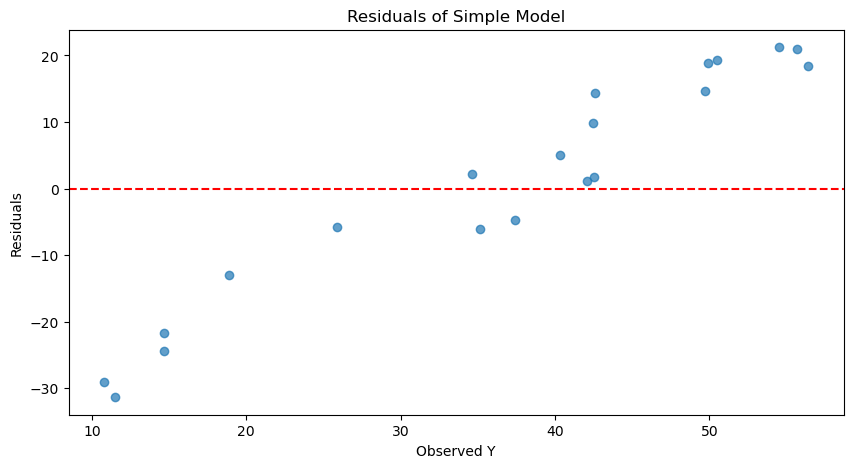

Dynamic Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.096
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.108
Time:                        11:46:00   Log-Likelihood:                -324.31
No. Observations:                  80   AIC:                             656.6
Df Residuals:                      76   BIC:                             666.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          40.8397     

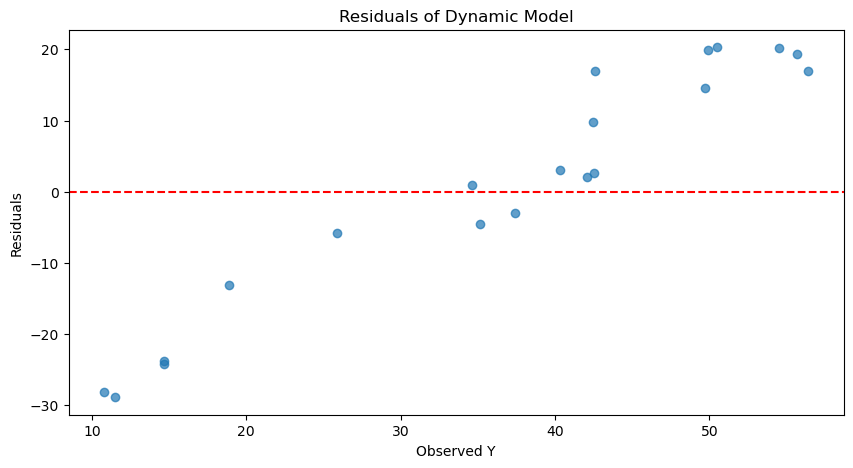

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your dataset


dataset1 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\apple_iphone_11_reviews.csv')
dataset2 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\Copy of fbdata.csv')
dataset3 = pd.read_csv(r'C:\Users\ADM\OneDrive\Documents\Infy-N0v24-Internship\superstore_dataset.csv')

master_dataset = pd.concat([dataset1, dataset2, dataset3], axis=1)

# Example data (replace with actual dataset)
np.random.seed(42)
df = pd.DataFrame({
    'X1': np.random.rand(100),
    'X2': np.random.rand(100),
    'Y': np.random.rand(100) * 50 + 10
})

# Split data
X = df[['X1', 'X2']]  # Replace with your feature columns
y = df['Y']           # Replace with your target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add an intercept for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Step 1: Simple model
simple_model = sm.OLS(y_train, X_train_sm).fit()
print("Simple Model Summary:")
print(simple_model.summary())

# Predictions and evaluation
y_pred_simple = simple_model.predict(X_test_sm)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
mae_simple = mean_absolute_error(y_test, y_pred_simple)
print(f"RMSE (Simple Model): {rmse_simple:.2f}")
print(f"MAE (Simple Model): {mae_simple:.2f}")

# Visualizing residuals
residuals_simple = y_test - y_pred_simple
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals_simple, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Simple Model")
plt.xlabel("Observed Y")
plt.ylabel("Residuals")
plt.show()

# Step 2: Adding interactions (dynamic model)
df['Interaction'] = df['X1'] * df['X2']
X = df[['X1', 'X2', 'Interaction']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

dynamic_model = sm.OLS(y_train, X_train_sm).fit()
print("Dynamic Model Summary:")
print(dynamic_model.summary())

# Predictions and evaluation
y_pred_dynamic = dynamic_model.predict(X_test_sm)
rmse_dynamic = np.sqrt(mean_squared_error(y_test, y_pred_dynamic))
mae_dynamic = mean_absolute_error(y_test, y_pred_dynamic)
print(f"RMSE (Dynamic Model): {rmse_dynamic:.2f}")
print(f"MAE (Dynamic Model): {mae_dynamic:.2f}")

# Comparing Adjusted R-squared
print(f"Adjusted R-squared (Simple Model): {simple_model.rsquared_adj:.4f}")
print(f"Adjusted R-squared (Dynamic Model): {dynamic_model.rsquared_adj:.4f}")

# Residual visualization for dynamic model
residuals_dynamic = y_test - y_pred_dynamic
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals_dynamic, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Dynamic Model")
plt.xlabel("Observed Y")
plt.ylabel("Residuals")
plt.show()


In [7]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Step 1: Define hyperparameter grid for Ridge and Lasso
ridge_params = {'alpha': np.logspace(-4, 4, 50)}  # Test various alpha values
lasso_params = {'alpha': np.logspace(-4, 4, 50)}  # Test various alpha values

# Step 2: Ridge Regression with Grid Search
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best parameters for Ridge
print("Best alpha for Ridge:", ridge_grid.best_params_['alpha'])
ridge_best = ridge_grid.best_estimator_

# Evaluate Ridge on the test set
y_pred_ridge = ridge_best.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge RMSE: {rmse_ridge:.2f}, Ridge MAE: {mae_ridge:.2f}")

# Step 3: Lasso Regression with Grid Search
lasso = Lasso(max_iter=10000)  # Increase max_iter for better convergence
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Best parameters for Lasso
print("Best alpha for Lasso:", lasso_grid.best_params_['alpha'])
lasso_best = lasso_grid.best_estimator_

# Evaluate Lasso on the test set
y_pred_lasso = lasso_best.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso RMSE: {rmse_lasso:.2f}, Lasso MAE: {mae_lasso:.2f}")

# Compare Adjusted R-squared
ridge_adj_r2 = 1 - (1 - ridge_best.score(X_train, y_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
lasso_adj_r2 = 1 - (1 - lasso_best.score(X_train, y_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print(f"Adjusted R-squared (Ridge): {ridge_adj_r2:.4f}")
print(f"Adjusted R-squared (Lasso): {lasso_adj_r2:.4f}")


Best alpha for Ridge: 2.559547922699533
Ridge RMSE: 16.30, Ridge MAE: 13.75
Best alpha for Lasso: 0.18420699693267145
Lasso RMSE: 16.11, Lasso MAE: 13.54
Adjusted R-squared (Ridge): 0.0338
Adjusted R-squared (Lasso): 0.0360


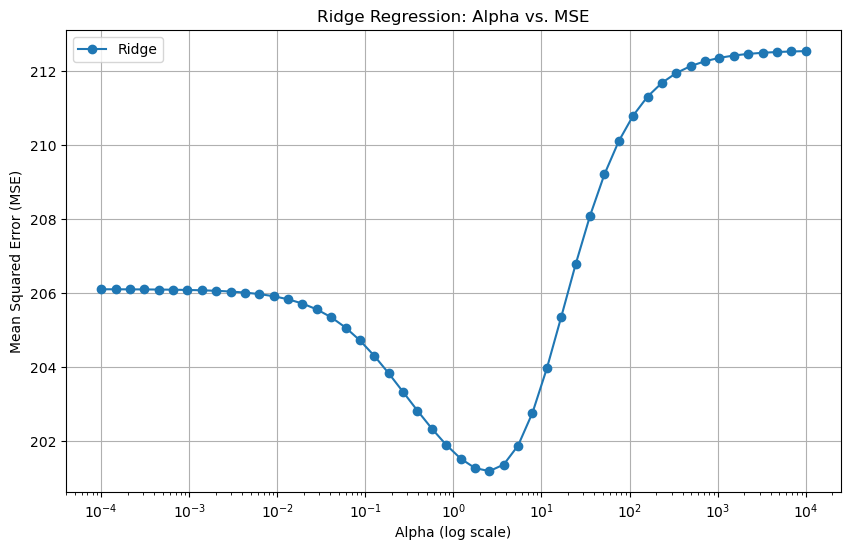

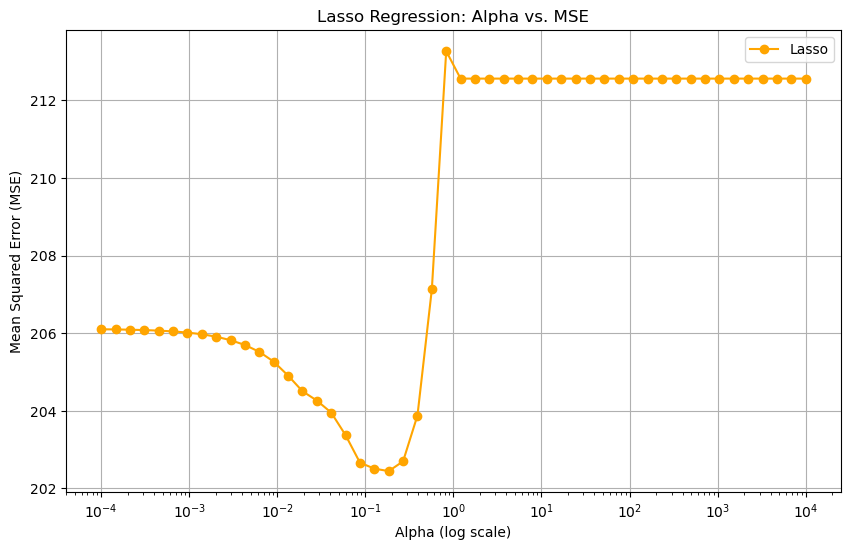

In [9]:
import matplotlib.pyplot as plt

# Plot Grid Search Results for Ridge
ridge_results = -ridge_grid.cv_results_['mean_test_score']  # Convert to positive MSE
ridge_alphas = ridge_params['alpha']

plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, ridge_results, label='Ridge', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression: Alpha vs. MSE')
plt.legend()
plt.grid()
plt.show()

# Plot Grid Search Results for Lasso
lasso_results = -lasso_grid.cv_results_['mean_test_score']  # Convert to positive MSE
lasso_alphas = lasso_params['alpha']

plt.figure(figsize=(10, 6))
plt.plot(lasso_alphas, lasso_results, label='Lasso', marker='o', color='orange')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression: Alpha vs. MSE')
plt.legend()
plt.grid()
plt.show()


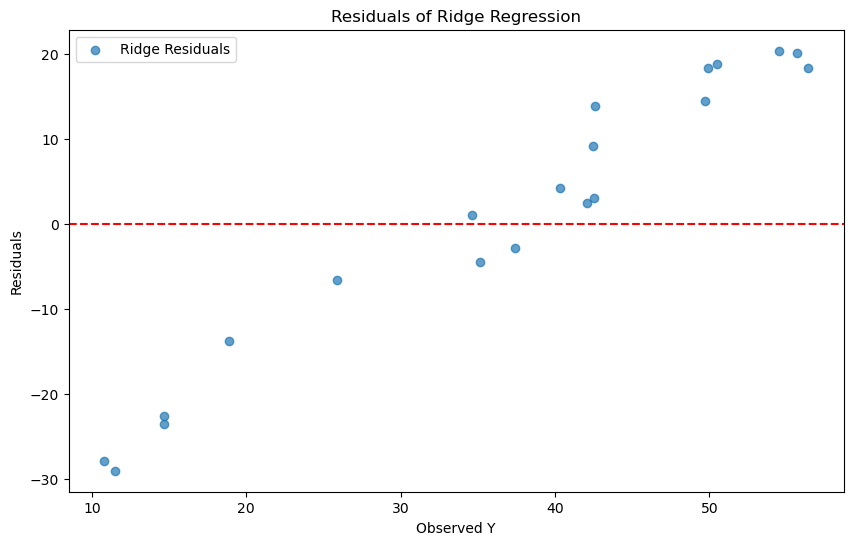

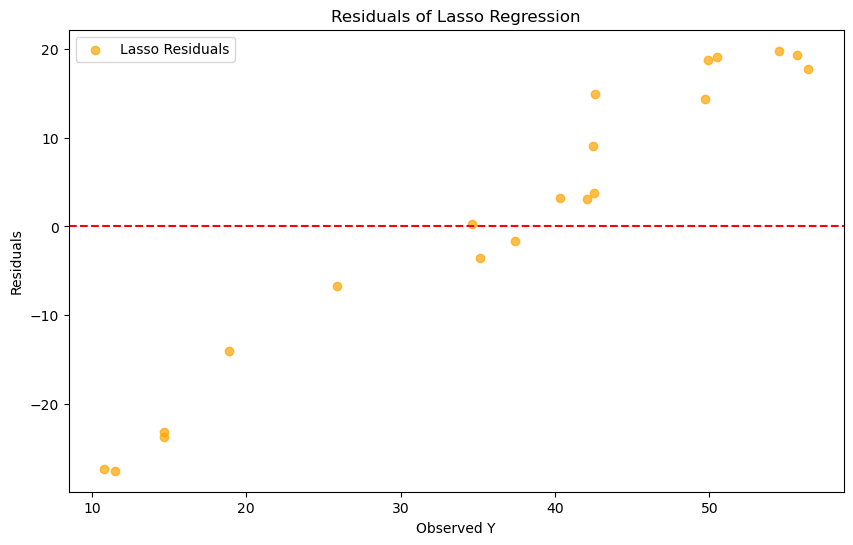

In [11]:
# Residuals for Ridge
ridge_residuals = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_residuals, alpha=0.7, label='Ridge Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Ridge Regression")
plt.xlabel("Observed Y")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Residuals for Lasso
lasso_residuals = y_test - y_pred_lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_residuals, alpha=0.7, label='Lasso Residuals', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Lasso Regression")
plt.xlabel("Observed Y")
plt.ylabel("Residuals")
plt.legend()
plt.show()


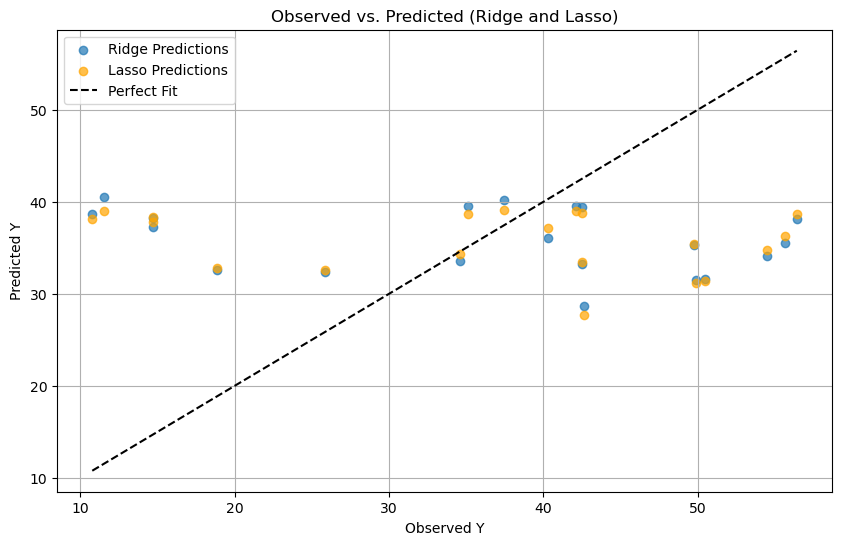

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, label='Ridge Predictions', alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label='Lasso Predictions', alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Observed Y")
plt.ylabel("Predicted Y")
plt.title("Observed vs. Predicted (Ridge and Lasso)")
plt.legend()
plt.grid()
plt.show()


Model Comparison Results:
       Adjusted R2       RMSE        MAE
OLS       0.039947  16.590604  13.903178
Ridge     0.033826  16.298704  13.753788
Lasso     0.035991  16.111716  13.542985


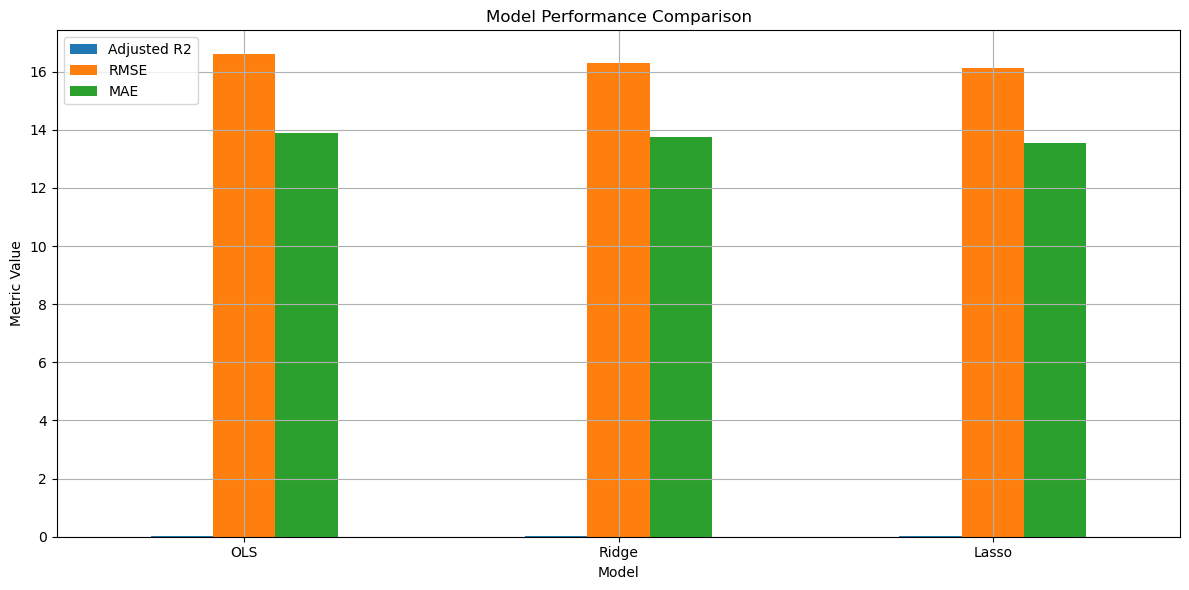

In [15]:
# Create a dictionary to store results
model_comparison = {}

# Function to calculate Adjusted R-squared
def adjusted_r2(model, X, y):
    r2 = model.score(X, y)
    n = len(y)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 1. OLS Model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

# Evaluate OLS
model_comparison['OLS'] = {
    'Adjusted R2': adjusted_r2(ols_model, X_train, y_train),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ols)),
    'MAE': mean_absolute_error(y_test, y_pred_ols)
}

# 2. Ridge Model
y_pred_ridge = ridge_best.predict(X_test)
model_comparison['Ridge'] = {
    'Adjusted R2': adjusted_r2(ridge_best, X_train, y_train),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test, y_pred_ridge)
}

# 3. Lasso Model
y_pred_lasso = lasso_best.predict(X_test)
model_comparison['Lasso'] = {
    'Adjusted R2': adjusted_r2(lasso_best, X_train, y_train),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'MAE': mean_absolute_error(y_test, y_pred_lasso)
}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(model_comparison).T  # Transpose for better readability
print("Model Comparison Results:")
print(results_df)

# Visualization of Metrics
results_df[['Adjusted R2', 'RMSE', 'MAE']].plot(kind='bar', figsize=(12, 6), grid=True)
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
